# 622 Day 74 Goals_ what you will make by the end of the day

**Combine Google Trends with other Time Series Data**

What can the popularity of search terms tell us about the world? Google Trends gives us access to the popularity of Google Search terms. Let's investigate:

- How search volume for "Bitcoin" relates to the price of Bitcoin
- How search volume for a hot stock like Telsa relates to that stock's price and
- How searches for "Unemployment Benefits" vary with the actual unemployment rate in the United States

What you'll learn today

- How to make time-series data comparable by resampling and converting to the same periodicity (e.g., from daily data to monthly data).
- Fine-tuning the styling of Matplotlib charts by using limits, labels, linestyles, markers, colours, and the chart's resolution.
- Using grids to help visually identify seasonality in a time series.
- Finding the number of missing and NaN values and how to locate NaN values in a DataFrame.
- How to work with Locators to better style the time axis on a chart
- Review the concepts learned in the previous three days and apply them to new datasets



# 623 Data Exploration - Making Sense of Google Search Data

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Your first step is to explore the data, by getting an understanding of what's actually in those .csv files for this project.

Start with df_tesla, then have a look at df_unemployment and finally, check out the two bitcoin DataFrames.

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')

df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
df_tesla.head(n=5)

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [4]:
# shape
df_tesla.shape

(124, 3)

In [5]:
# number of rows and columns
# names of the columns
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


In [6]:
# What is the largest number/smallest number in the search data column?
# Try using the .describe() function.
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [7]:
max_search = df_tesla['TSLA_WEB_SEARCH'].max()
min_search = df_tesla['TSLA_WEB_SEARCH'].min()

In [8]:
print(f'Largest value for Tesla in Web Search: {max_search}')
print(f'Smallest value for Tesla in Web Search: {min_search}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [9]:
# What is the periodicity of the time series data (daily, weekly, monthly)?
pd.infer_freq(df_tesla['MONTH'])

'MS'

What does "MS" mean? [This link](https://pandas.pydata.org/docs/user_guide/timeseries.html) contains all the possible outputs and their meanings.

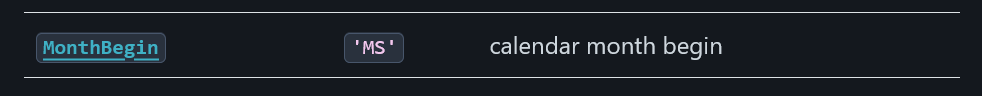

What does a value of 100 in the Google Trend search popularity actually mean?

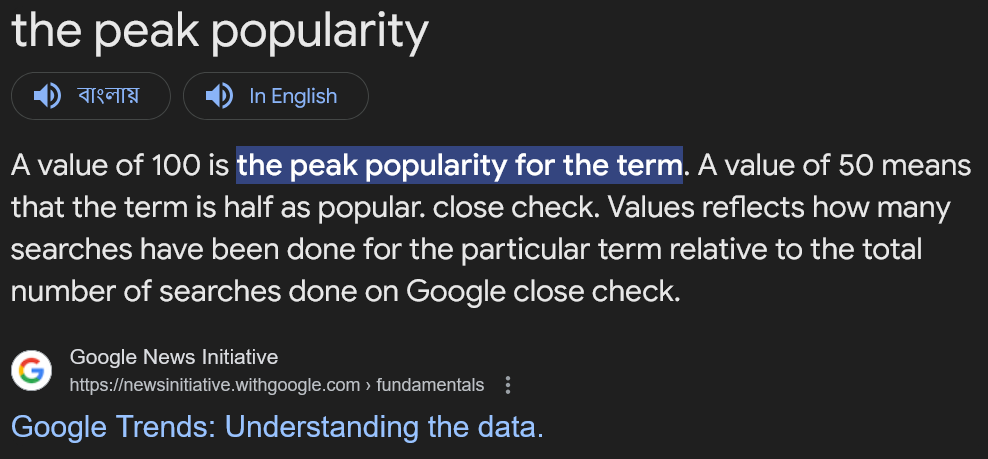

Basically, the actual search volume of a term is not publicly available. Google only offers a scaled number. Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity.

### Unemployment Data

In [10]:
df_unemployment.head(n=5)

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [11]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [12]:
df_btc_search.head(n=5)

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [13]:
df_btc_search.shape

(73, 2)

In [14]:
df_btc_price.head(n=5)

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [15]:
df_btc_price.shape

(2204, 3)

In [16]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


For each word in your search, Google finds how much search volume in each region and time period your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across your topics, so the largest measure is set to 100. In short: Google Trends doesn’t exactly tell you how many searches occurred for your topic, but it does give you a nice proxy.

Here are the Google Trends Search Parameters that I used to generate the .csv data:

- "Tesla", Worldwide, Web Search
- "Bitcoin", Worldwide, News Search
- "Unemployment Benefits", United States, Web Search

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-10_10-37-10-b0e4a8a0fd6d583993afbb72388ac731.png' width="900" height="600">

# 624 Data Cleaning - Resampling Time Series Data

# Data Cleaning

First, we have to identify if there are any missing or junk values in our DataFrames.

**Challenge**

- Can you investigate all 4 DataFrames and find if there are any missing values?
- If yes, find how many missing or NaN values there are. Then, find the row where the missing values occur.
- Finally, remove any rows that contain missing values.

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [17]:
# tesla
df_tesla.isnull()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
119,False,False,False
120,False,False,False
121,False,False,False
122,False,False,False


In [18]:
df_unemployment.isnull()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
176,False,False,False
177,False,False,False
178,False,False,False
179,False,False,False


In [19]:
df_btc_search.isnull()

,MONTH,BTC_NEWS_SEARCH
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
68,False,False
69,False,False
70,False,False
71,False,False


So there is no missing values. How do I get the output in a simple True of False?

In [20]:
df_tesla.isnull().values.any()
df_unemployment.isnull().values.any()
df_btc_search.isnull().values.any()

False

In [21]:
print(f'Missing values for Tesla?: {df_tesla.isnull().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isnull().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isnull().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [22]:
print(f'Missing values for BTC price?: {df_btc_price.isnull().values.any()}')

Missing values for BTC price?: True


So the price dataframe has missing values.

In [23]:
df_btc_price.isna()

,DATE,CLOSE,VOLUME
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2199,False,False,False
2200,False,False,False
2201,False,False,False
2202,False,False,False


**Why df.isnull() Doesn't Directly Show Null Rows**

Understanding df.isnull():

- df.isnull() returns a DataFrame of the same size as the original, with Boolean values indicating whether each value is null.
- It doesn't directly display the rows with null values; it simply provides a mask or indicator of where null values exist.

In [24]:
# how to find which specific rows have missing values?
# attempt 1
df_btc_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2204 non-null   object 
 1   CLOSE   2203 non-null   float64
 2   VOLUME  2203 non-null   float64
dtypes: float64(2), object(1)
memory usage: 51.8+ KB


We can see that there is one entry in both 'CLOSE' and 'VOLUME' which is null.

In [25]:
df_btc_price.loc[2148]

,2148
DATE,2020-08-04
CLOSE,NaN
VOLUME,NaN


Gotcha!

In [26]:
df_btc_price[df_btc_price['CLOSE'] == 11747.022461]

,DATE,CLOSE,VOLUME
2149,2020-08-05,11747.022461,2.441125e+10


In [27]:
df_btc_price[df_btc_price['CLOSE'] > 11747.022461]

,DATE,CLOSE,VOLUME
1175,2017-12-05,11916.700195,6.895260e+09
1176,2017-12-06,14291.500000,1.265630e+10
1177,2017-12-07,17899.699219,1.795070e+10
1178,2017-12-08,16569.400391,2.113600e+10
1179,2017-12-09,15178.200195,1.391130e+10
...,...,...,...
2162,2020-08-18,11991.233398,2.604323e+10
2163,2020-08-19,11758.283203,2.450285e+10
2164,2020-08-20,11878.372070,2.017524e+10
2168,2020-08-24,11774.595703,2.068151e+10


In [28]:
len(df_btc_price[df_btc_price['CLOSE'].isnull()])

1

In [29]:
df_btc_price.isnull().values.sum()

2

In [30]:
print(f'Number of missing values: {df_btc_price.isnull().values.sum()} ')

Number of missing values: 2 


**Challenge**: Remove any missing values that you found.

In [31]:
df_btc_price[df_btc_price['CLOSE'].isnull()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [32]:
df_btc_price[df_btc_price['CLOSE'].isnull()].index

Index([2148], dtype='int64')

In [33]:
df_btc_price.dropna(inplace=True)

In [34]:
df_btc_price.loc[2145:2150]

,DATE,CLOSE,VOLUME
2145,2020-08-01,11759.592773,2.607567e+10
2146,2020-08-02,11053.614258,2.741007e+10
2147,2020-08-03,11246.348633,2.027171e+10
2149,2020-08-05,11747.022461,2.441125e+10
2150,2020-08-06,11779.773438,2.340074e+10


The entire row with the index 2148 has been removed.

Our DataFrames contain time-series data. Do you remember how to check the data type of the entries in the DataFrame? Have a look at the data types of the MONTH or DATE columns. Convert any strings you find into Datetime objects. Do this for all 4 DataFrames. Double-check if your type conversion was successful.

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [35]:
df_tesla.dtypes

,0
MONTH,object
TSLA_WEB_SEARCH,int64
TSLA_USD_CLOSE,float64


In [36]:
# convert the 'MONTH' column to datetime format
df_tesla['MONTH']= pd.to_datetime(df_tesla['MONTH'])

In [37]:
df_tesla.dtypes

,0
MONTH,datetime64[ns]
TSLA_WEB_SEARCH,int64
TSLA_USD_CLOSE,float64


In [38]:
# do the same for the other dataframes
df_btc_search['MONTH']= pd.to_datetime(df_btc_search['MONTH'])
df_btc_price['DATE']= pd.to_datetime(df_btc_price['DATE'])
df_unemployment['MONTH']= pd.to_datetime(df_unemployment['MONTH'])

In [39]:
df_btc_price.dtypes

,0
DATE,datetime64[ns]
CLOSE,float64
VOLUME,float64


In [40]:
df_btc_search.dtypes

,0
MONTH,datetime64[ns]
BTC_NEWS_SEARCH,int64


In [41]:
df_unemployment.dtypes

,0
MONTH,datetime64[ns]
UE_BENEFITS_WEB_SEARCH,int64
UNRATE,float64


### Resampling Time Series Data

Next, we have to think about how to make our Bitcoin price and our Bitcoin search volume comparable. Our Bitcoin price is daily data, but our Bitcoin Search Popularity is monthly data.

To convert our daily data into monthly data, we're going to use the `.resample()` function. The only things we need to specify is which column to use (i.e., our DATE column) and what kind of sample frequency we want (i.e., the "rule"). We want a monthly frequency, so we use 'M'.  If you ever need to resample a time series to a different frequency, you can find a list of different options [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) (for example 'Y' for yearly or 'T' for minute).

After resampling, we need to figure out how the data should be treated. In our case, we want the last available price of the month - the price at month-end.


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [42]:
df_btc_price.head(n=3)

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0


In [43]:
df_btc_price_monthly = df_btc_price.set_index('DATE')

In [44]:
df_btc_price_monthly.head(n=3)

,CLOSE,VOLUME
DATE,,
2014-09-17,457.334015,21056800.0
2014-09-18,424.440002,34483200.0
2014-09-19,394.795990,37919700.0


In [45]:
df_btc_price_monthly = df_btc_price_monthly.resample('M')

In [46]:
df_btc_price_monthly.head(n=3)

AttributeError: 'DatetimeIndexResampler' object has no attribute 'head'

**Understanding the Issue**

The resample method in pandas returns a DatetimeIndexResampler object. This object represents a resampling operation, but it doesn't contain the actual resampled data yet. To get the resampled data, you need to apply an aggregation function like mean, sum, first, last, etc.

*After resampling, we need to figure out how the data should be treated. In our case, we want the last available price of the month - the price at month-end.*

In [47]:
df_btc_price_monthly = df_btc_price_monthly.last()

In [48]:
df_btc_price_monthly.head(n=3)

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0


We can also make use of the argument `on` in the dataframe -

<img src=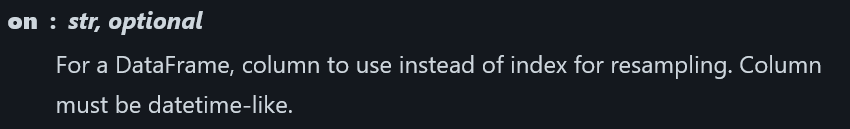>

In [49]:
df_btc_price_monthly_2 = df_btc_price.resample('M', on='DATE').last()

In [50]:
df_btc_price_monthly_2.head(n=3)

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0


OH! So both the methods generate the same output.

In [51]:
df_btc_price_monthly.shape

(73, 2)

# 625 Data Visualisation - Tesla Line Charts in Matplotlib

# Data Visualisation

### Notebook Formatting & Style Helpers

In [52]:
# Create locators for ticks on the time axis

In [53]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

In [54]:
import matplotlib.pyplot as plt

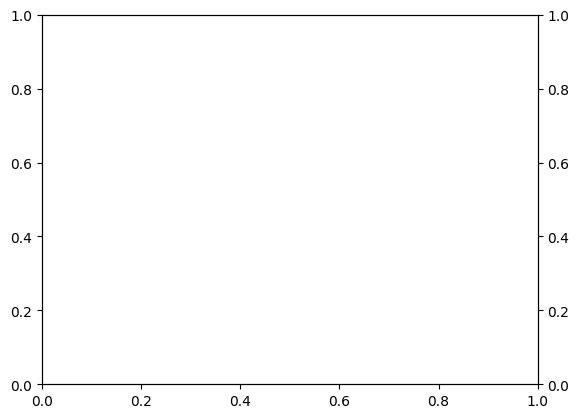

In [55]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

In [56]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


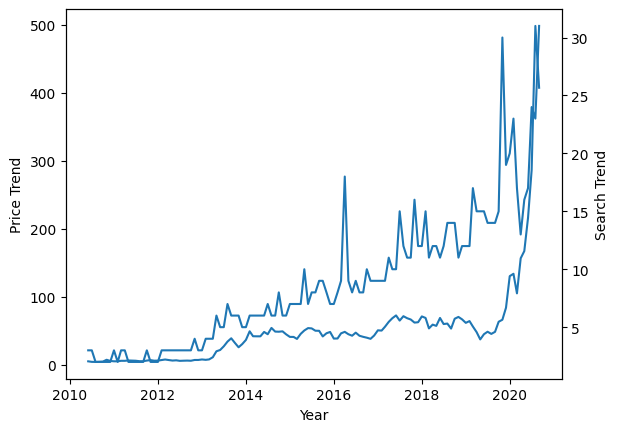

In [57]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.set_xlabel('Year', fontsize=10)
ax1.set_ylabel('Price Trend', fontsize=10,)
ax2.set_ylabel('Search Trend', fontsize=10,)

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'])
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'])

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price.
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

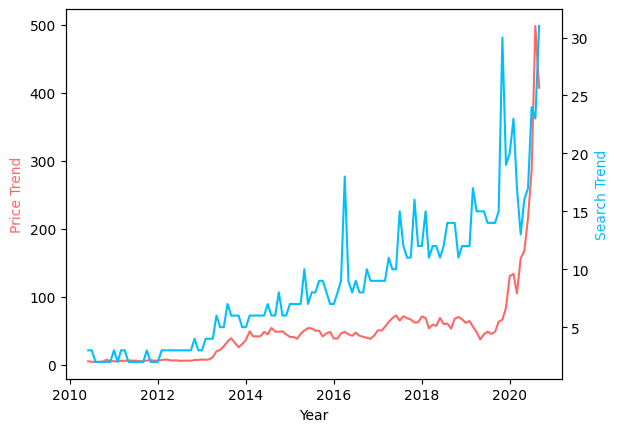

In [58]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.set_xlabel('Year', fontsize=10)
ax1.set_ylabel('Price Trend', fontsize=10, color='#ff6767') # using a HEX code for a red colour for the stock price
ax2.set_ylabel('Search Trend', fontsize=10, color='deepskyblue') # using one of the blue colour names for the search volume

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='#ff6767')
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='deepskyblue')

**Challenge**: Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

In [59]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MONTH            124 non-null    datetime64[ns]
 1   TSLA_WEB_SEARCH  124 non-null    int64         
 2   TSLA_USD_CLOSE   124 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.0 KB


In [60]:
print(df_tesla['MONTH'].min())
print(df_tesla['MONTH'].max())
# print(float(df_tesla['MONTH'].min()))
# print(float(df_tesla['MONTH'].max()))

2010-06-01 00:00:00
2020-09-01 00:00:00


In [61]:
# print(pd.to_datetime(2012))
# print(pd.to_datetime(2020))
for date in df_tesla['MONTH']:
  print(date)

2010-06-01 00:00:00
2010-07-01 00:00:00
2010-08-01 00:00:00
2010-09-01 00:00:00
2010-10-01 00:00:00
2010-11-01 00:00:00
2010-12-01 00:00:00
2011-01-01 00:00:00
2011-02-01 00:00:00
2011-03-01 00:00:00
2011-04-01 00:00:00
2011-05-01 00:00:00
2011-06-01 00:00:00
2011-07-01 00:00:00
2011-08-01 00:00:00
2011-09-01 00:00:00
2011-10-01 00:00:00
2011-11-01 00:00:00
2011-12-01 00:00:00
2012-01-01 00:00:00
2012-02-01 00:00:00
2012-03-01 00:00:00
2012-04-01 00:00:00
2012-05-01 00:00:00
2012-06-01 00:00:00
2012-07-01 00:00:00
2012-08-01 00:00:00
2012-09-01 00:00:00
2012-10-01 00:00:00
2012-11-01 00:00:00
2012-12-01 00:00:00
2013-01-01 00:00:00
2013-02-01 00:00:00
2013-03-01 00:00:00
2013-04-01 00:00:00
2013-05-01 00:00:00
2013-06-01 00:00:00
2013-07-01 00:00:00
2013-08-01 00:00:00
2013-09-01 00:00:00
2013-10-01 00:00:00
2013-11-01 00:00:00
2013-12-01 00:00:00
2014-01-01 00:00:00
2014-02-01 00:00:00
2014-03-01 00:00:00
2014-04-01 00:00:00
2014-05-01 00:00:00
2014-06-01 00:00:00
2014-07-01 00:00:00


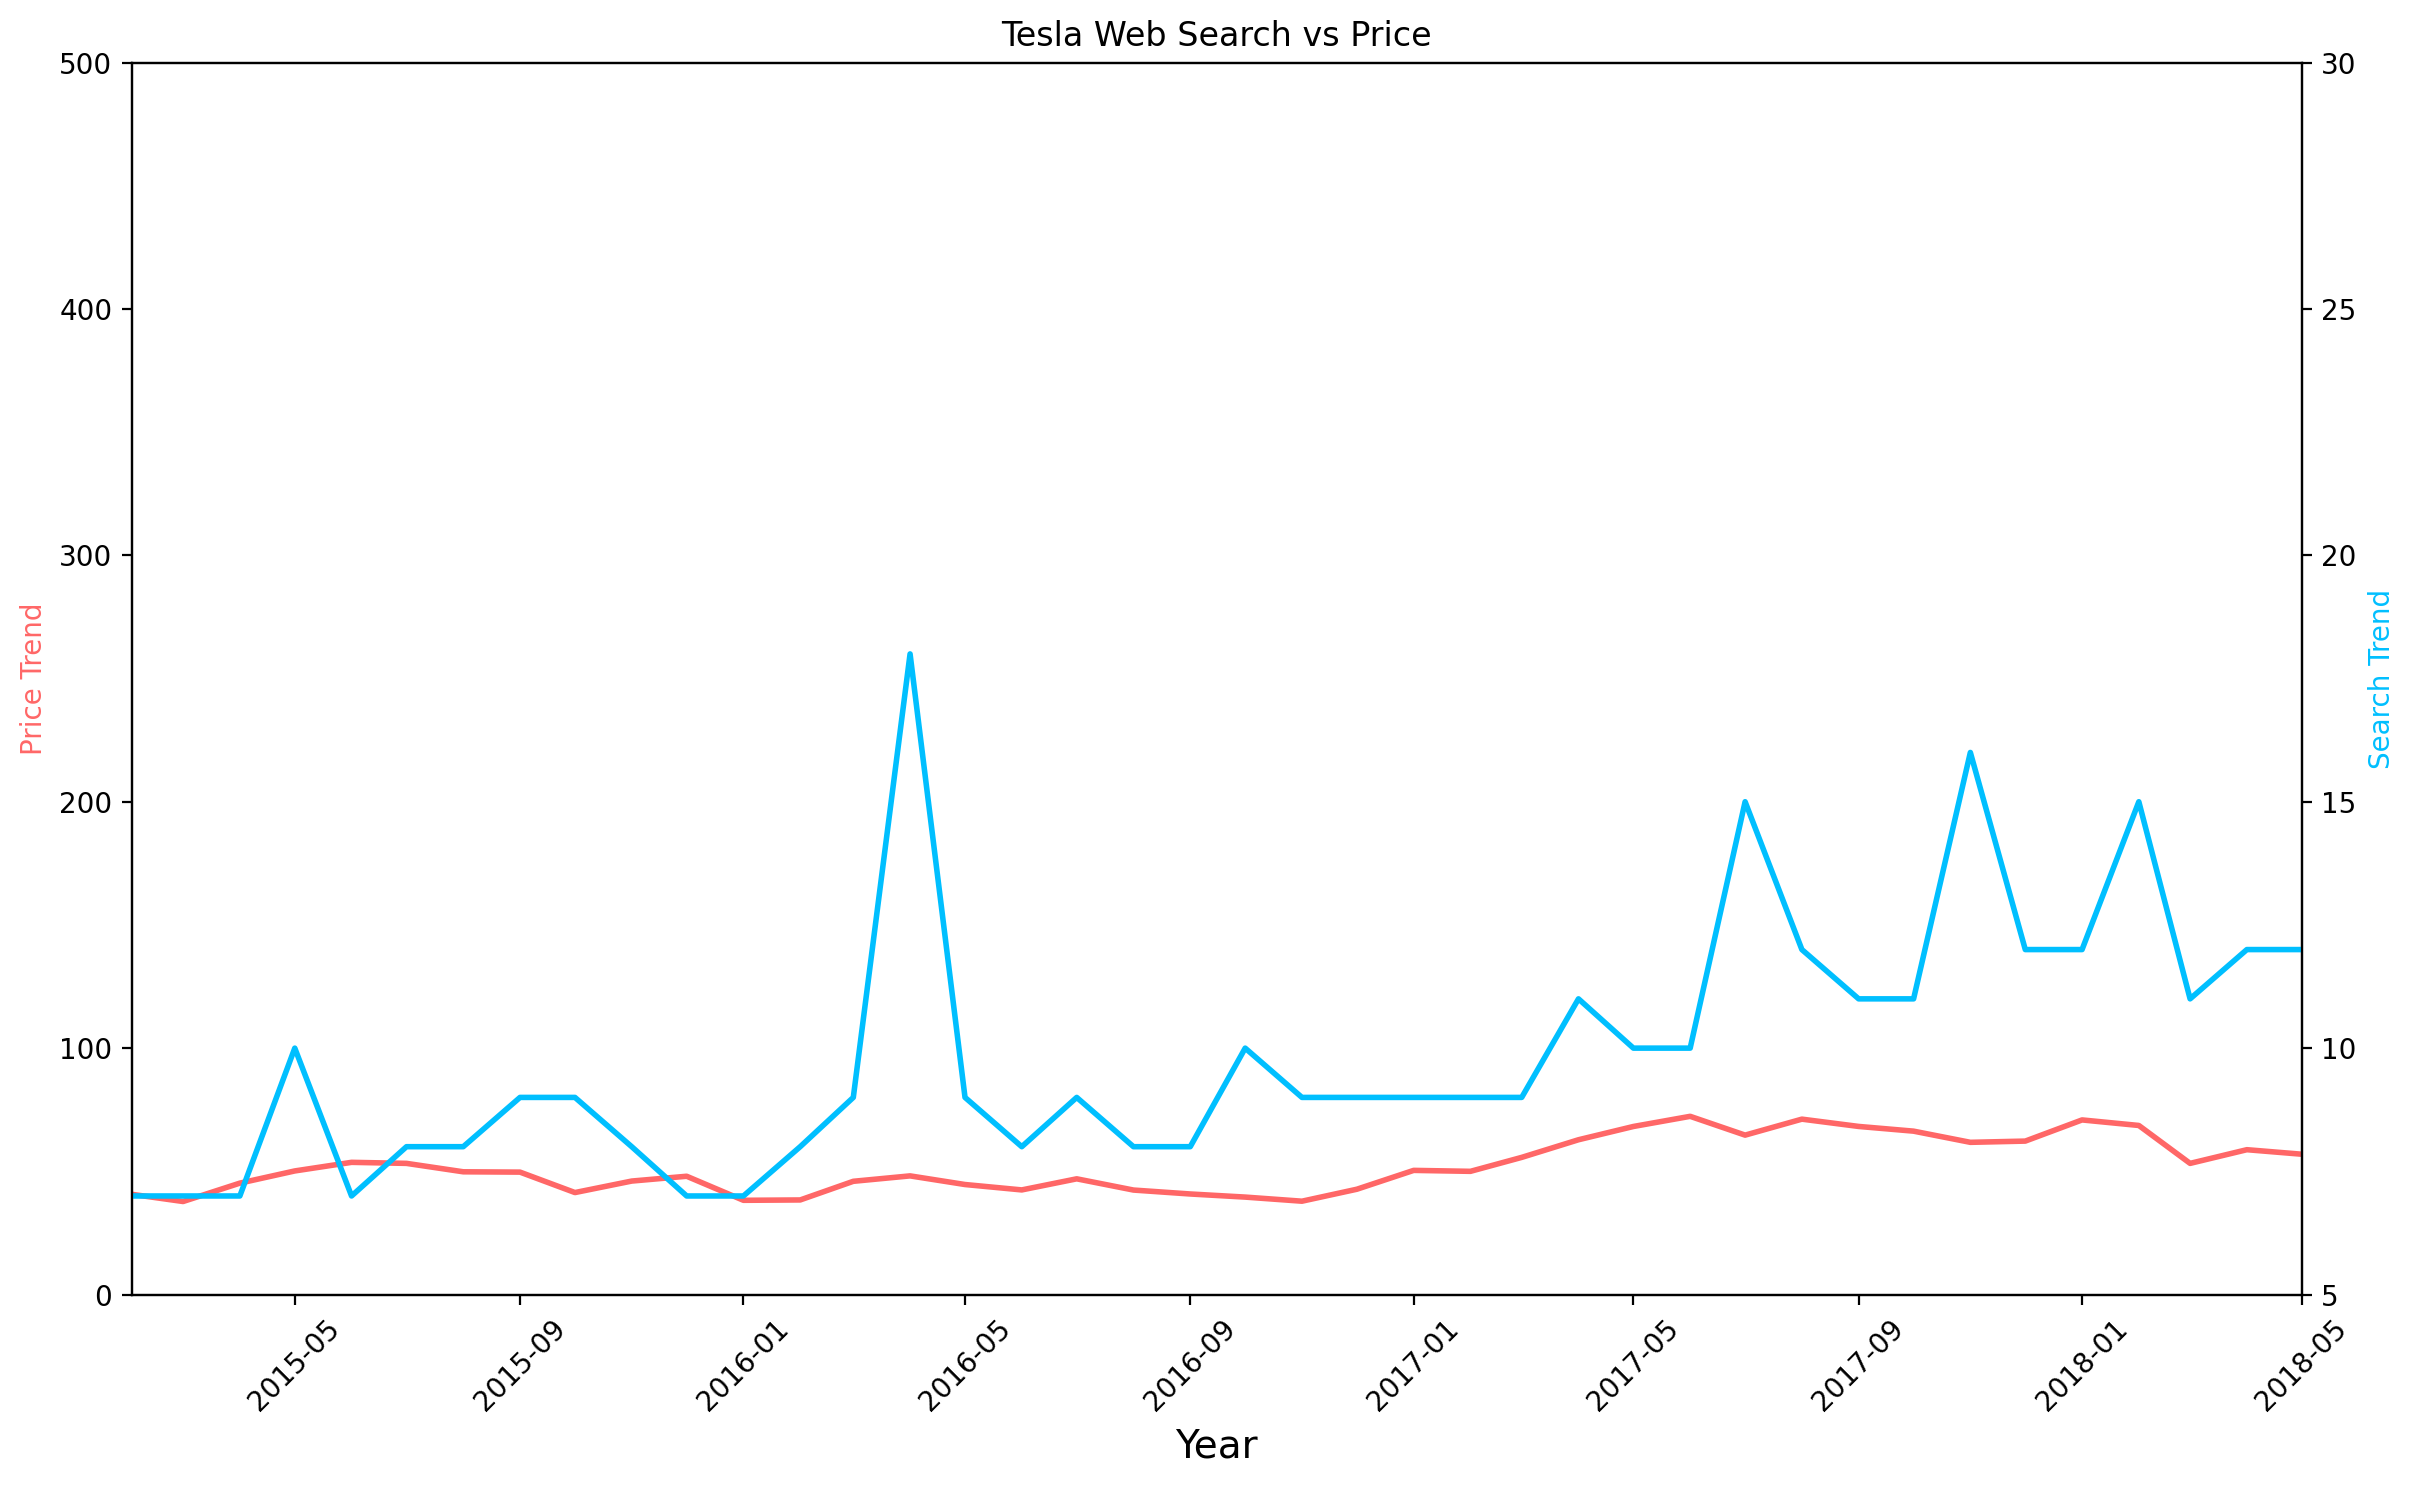

In [62]:
plt.figure(figsize=(14,8), dpi=200) # increased the figure size (e.g., to 14 by 8) and changed dpi
plt.xticks(rotation=45) # rotated the xticks

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.set_xlabel('Year', fontsize=14) # increase the font size
ax1.set_ylabel('Price Trend', fontsize=10, color='#ff6767') # using a HEX code for a red colour for the stock price
ax2.set_ylabel('Search Trend', fontsize=10, color='deepskyblue') # using one of the blue colour names for the search volume


plt.title('Tesla Web Search vs Price') # added title

# setting axes limits
ax1.set_xlim(pd.to_datetime('2015-02-01 00:00:00'), pd.to_datetime('2018-05-01 00:00:00'))
ax1.set_ylim(0, 500)
ax2.set_xlim(pd.to_datetime('2015-02-01 00:00:00'), pd.to_datetime('2018-05-01 00:00:00'))
ax2.set_ylim(5, 30)

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='#ff6767', linewidth=2.0) # made the lines thicker
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='deepskyblue', linewidth=2.0)

plt.show() # used plt.show()

# 626 Using Locators and DateFormatters to generate Tick Marks on a Time Line

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-10_10-57-39-2376090b467db02dceb424bf07223dc7.png' />

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-10_10-57-46-18d3f3b6a5aeb054538191a6e2bcdc45.png' />

The first step is importing `matplotlib.dates`.  This is where all the date plotting capabilities live.

In [63]:
import matplotlib.dates as mdates

Next, we need a `YearLocator()` and a `MonthLocator()` objects, which will help Matplotlib find the years and the months. Then we also need a `DateFormatter()`, which will help us specify how we want to display the dates.

**How to add tick formatting for dates on the x-axis.**

In [64]:
# create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

Now we can go back to our chart and format where the major and minor ticks should be using the Locators.

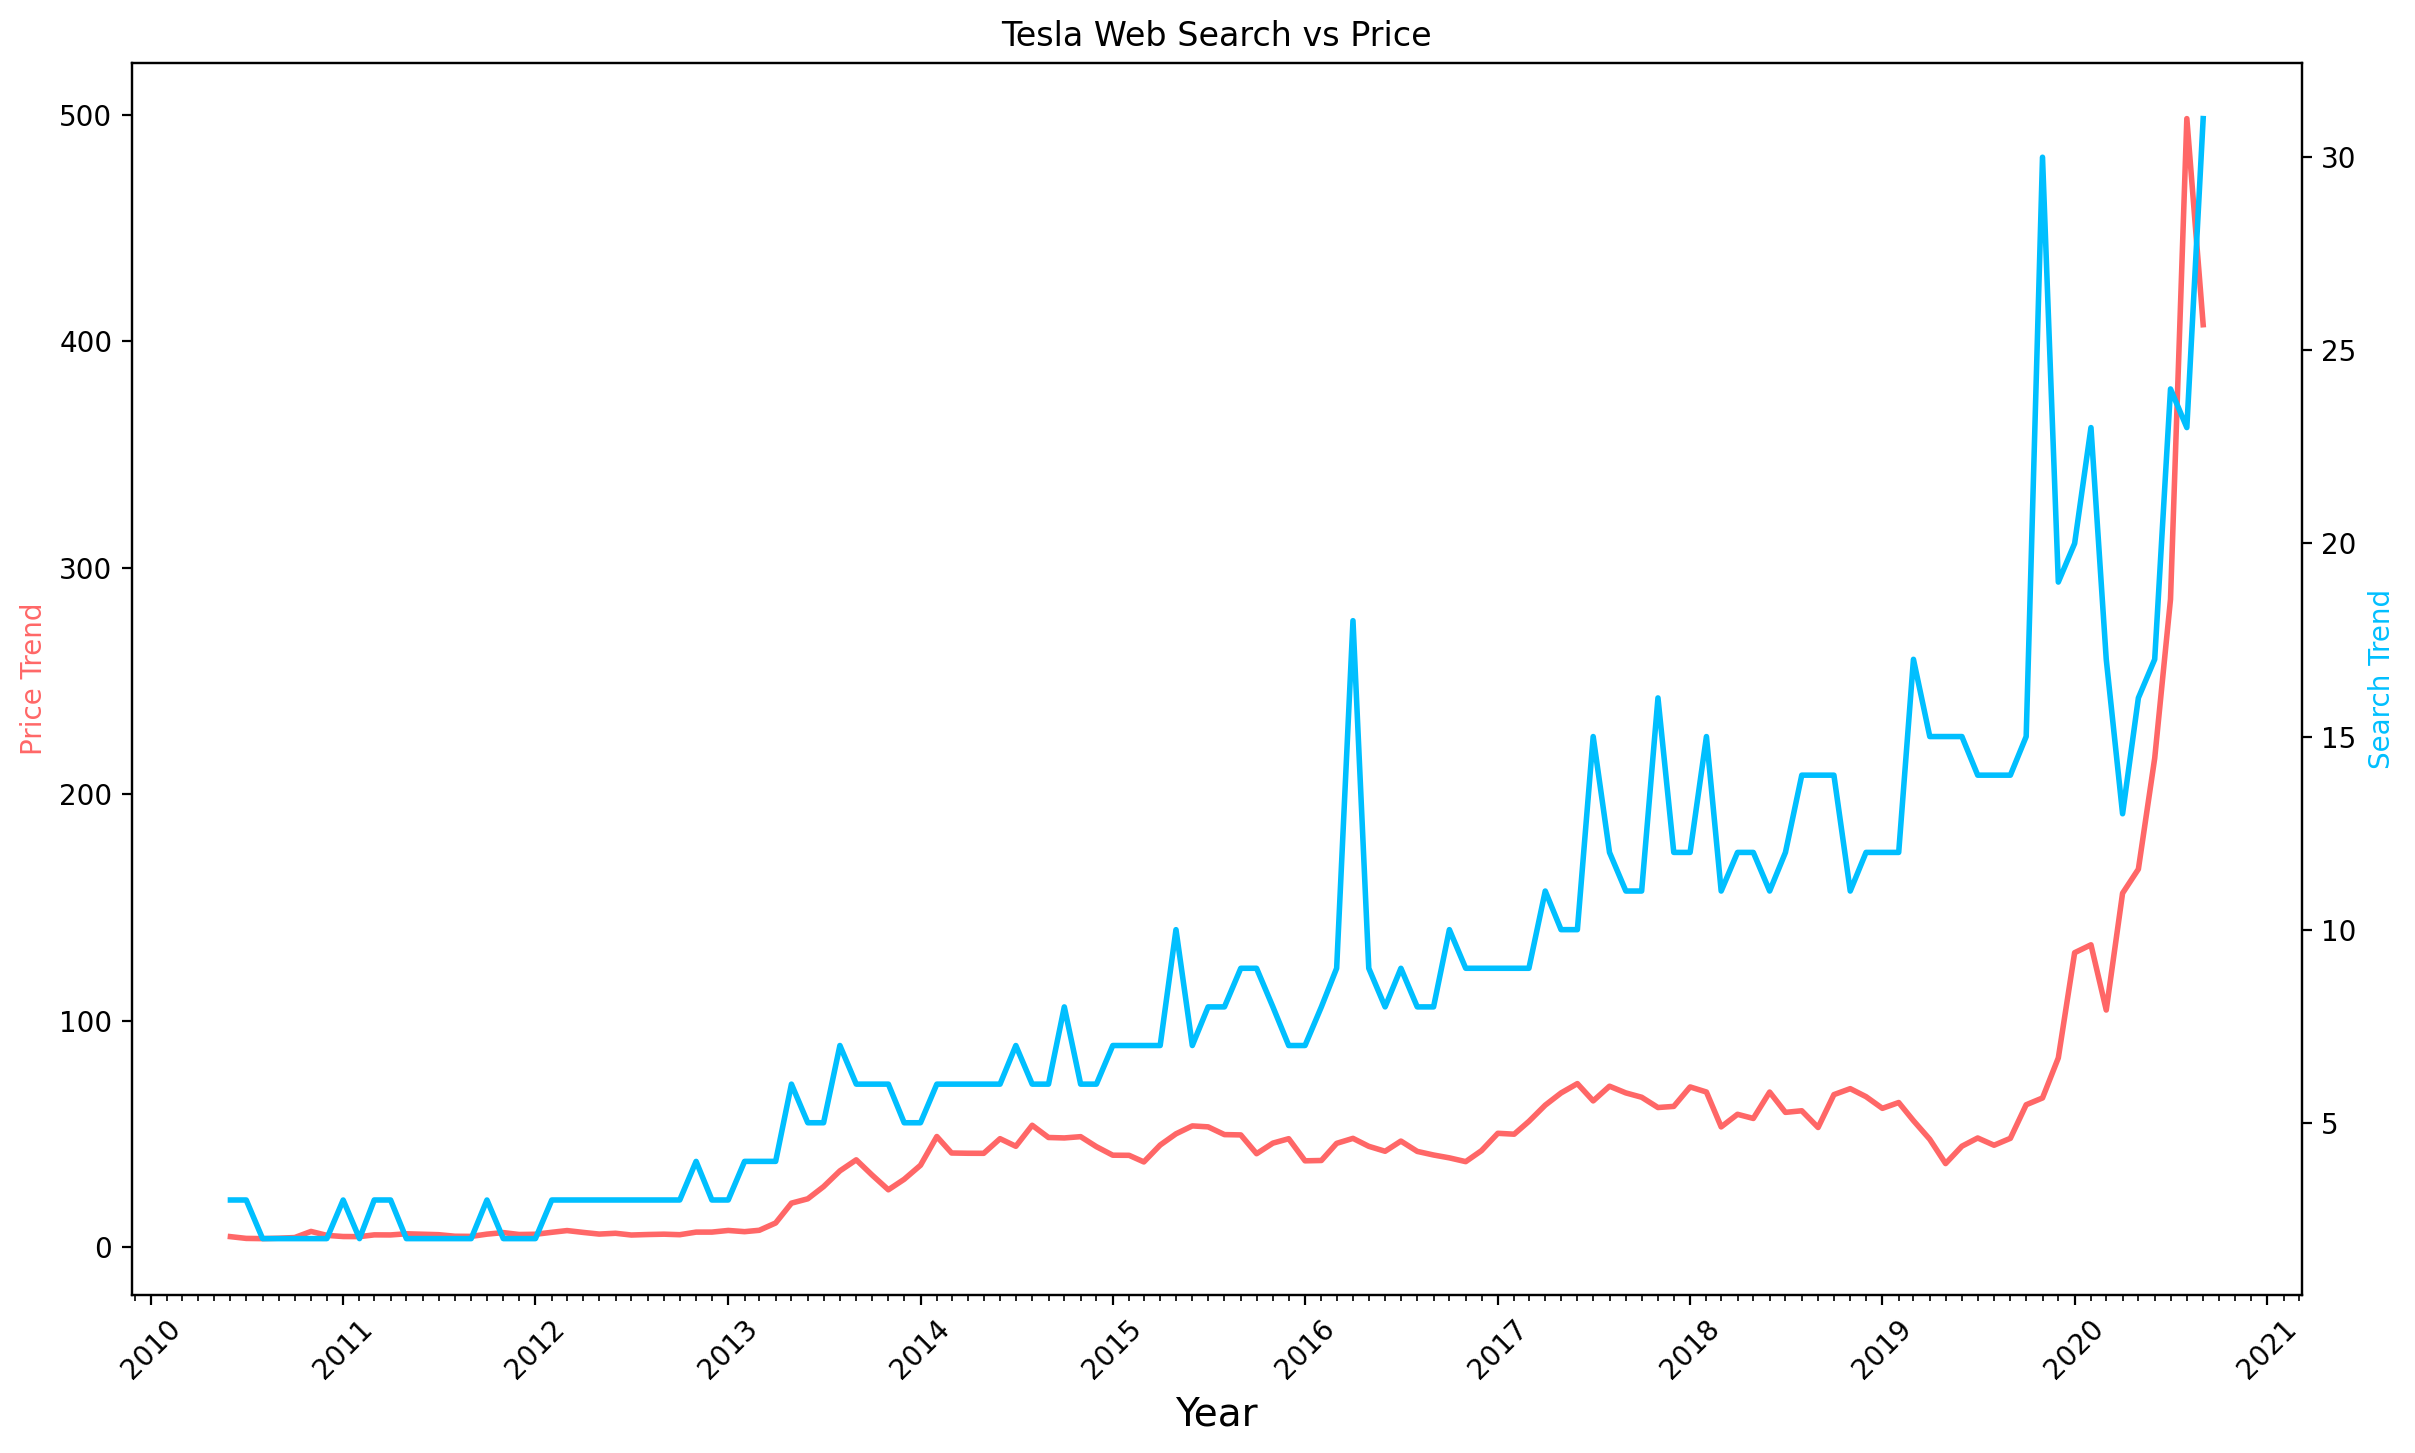

In [65]:
plt.figure(figsize=(14,8), dpi=200) # increased the figure size (e.g., to 14 by 8) and changed dpi
plt.xticks(rotation=45) # rotated the xticks

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

ax1.set_xlabel('Year', fontsize=14) # increase the font size
ax1.set_ylabel('Price Trend', fontsize=10, color='#ff6767') # using a HEX code for a red colour for the stock price
ax2.set_ylabel('Search Trend', fontsize=10, color='deepskyblue') # using one of the blue colour names for the search volume

plt.title('Tesla Web Search vs Price') # added title

# # setting axes limits
# ax1.set_xlim(pd.to_datetime('2015-02-01 00:00:00'), pd.to_datetime('2018-05-01 00:00:00'))
# ax1.set_ylim(0, 500)
# ax2.set_xlim(pd.to_datetime('2015-02-01 00:00:00'), pd.to_datetime('2018-05-01 00:00:00'))
# ax2.set_ylim(5, 30)

ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='#ff6767', linewidth=2.0) # made the lines thicker
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='deepskyblue', linewidth=2.0)

plt.show() # used plt.show()

When we take a look at our chart, we can see the tick marks nicely. The tick marks also allow us to visually date that spike of interest in the middle of the chart - March 2016. This was when the Tesla Model 3 was unveiled. Also, we can clearly see that the most recent spikes in search coincide, not with the release of a new car, but the roaring stock price for the company!

# 627 Data Visualisation - Bitcoin_ Line Style and Markers

Now that we've got Tesla looking the way we want it to, let's do the same for Bitcoin. We've already matched the sample frequency and we can re-use our chart! Simply copy-paste the entire cell and make some modifications to the code as per the challenge.

In [66]:
df_btc_price_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 2014-09-30 to 2020-09-30
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   73 non-null     float64
 1   VOLUME  73 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


We can see that during our resampling, the 'DATE' column turned to the index. So we need to do the resampling again, don't we? The `df_btc_search` dataframe still contains the 'MONTH' column, so we will also need a same for the price data.

In [67]:
df_btc_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MONTH            73 non-null     datetime64[ns]
 1   BTC_NEWS_SEARCH  73 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 KB


In [68]:
df_btc_search.head(n=3)

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4


In [69]:
df_btc_price.head(n=3)

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0


In [70]:
df_btc_price_monthly_3 = df_btc_price.resample('M', on='DATE').mean()

In [71]:
df_btc_price_monthly_3.head(n=3)

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07


In [72]:
df_btc_price_monthly_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 2014-09-30 to 2020-09-30
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   73 non-null     float64
 1   VOLUME  73 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


This resampled dataframe, just like the others before, do not contain the 'DATE' column. Pandas, while resampling, transforms the 'DATE' column into the index column. How can I render the 'DATE' column back into the dataframe and not have it as an index column?

In [73]:
df_btc_price_monthly_3.reset_index(inplace=True)

In [74]:
df_btc_price_monthly_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    73 non-null     datetime64[ns]
 1   CLOSE   73 non-null     float64       
 2   VOLUME  73 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.8 KB


**Bingo!**

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

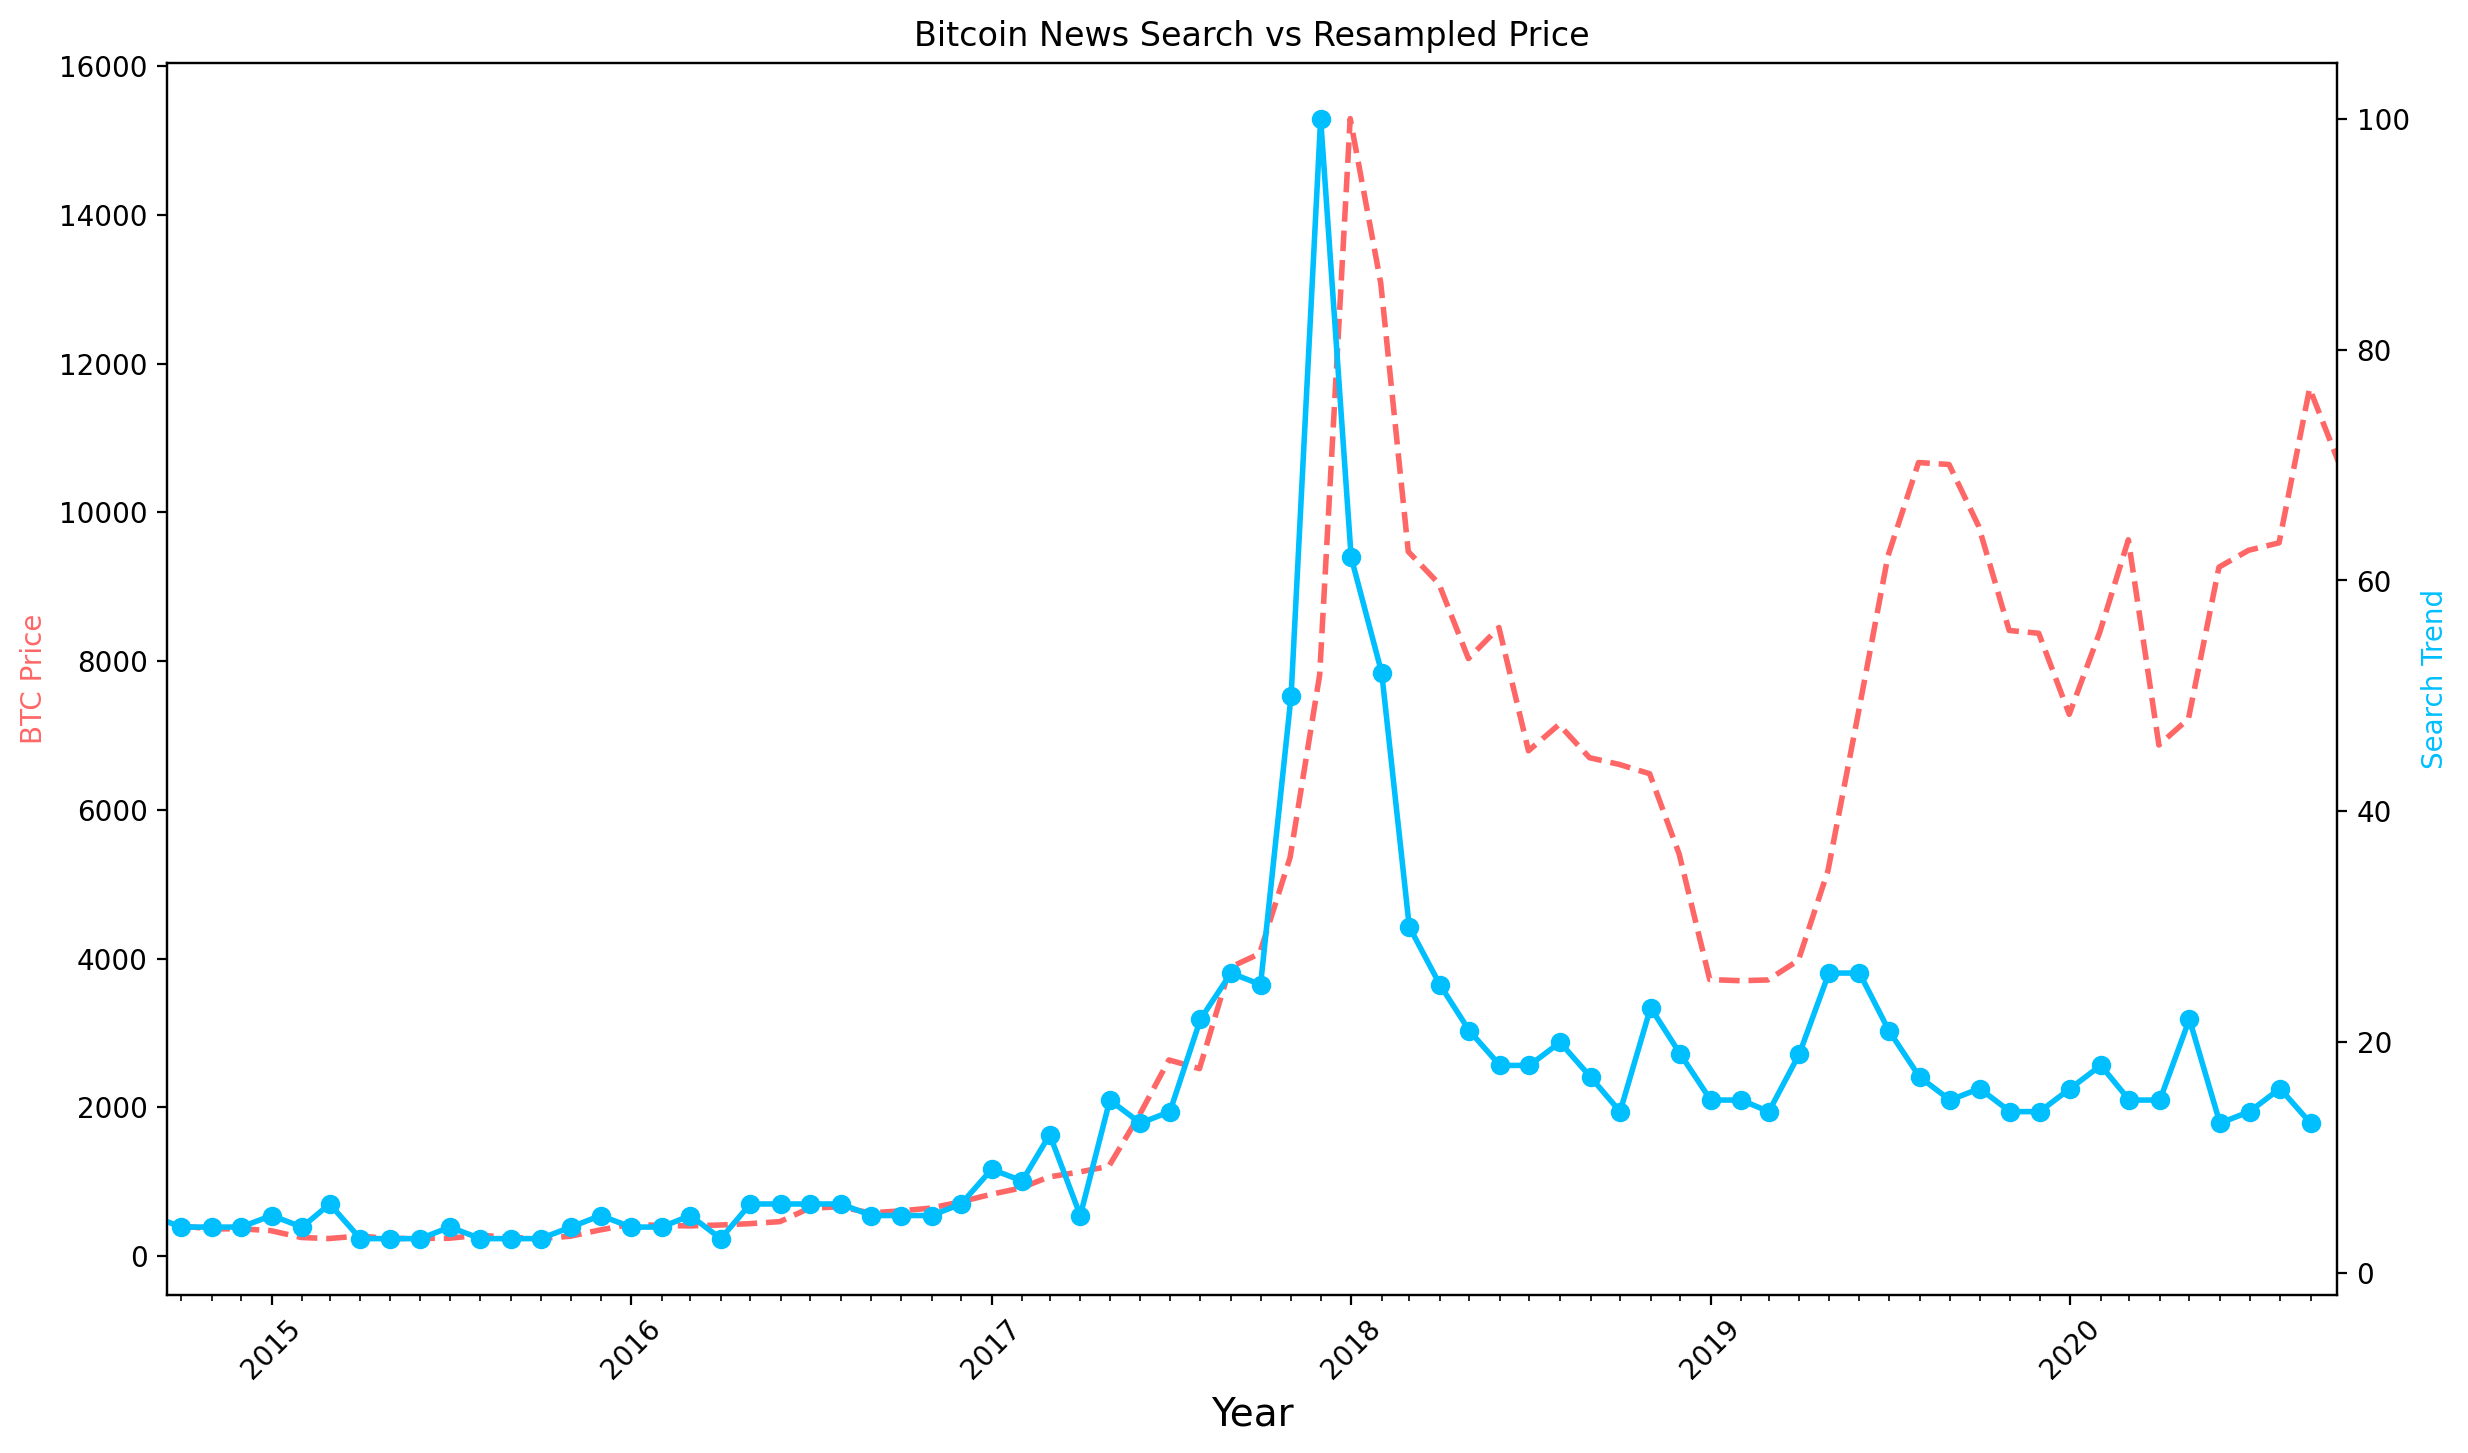

In [75]:
plt.figure(figsize=(14,8), dpi=200) # increased the figure size (e.g., to 14 by 8) and changed dpi
plt.xticks(rotation=45) # rotated the xticks

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

ax1.set_xlabel('Year', fontsize=14) # increase the font size
ax1.set_ylabel('BTC Price', fontsize=10, color='#ff6767') # using a HEX code for a red colour for the stock price
ax2.set_ylabel('Search Trend', fontsize=10, color='deepskyblue') # using one of the blue colour names for the search volume

plt.title('Bitcoin News Search vs Resampled Price') # added title

# # setting axes limits
ax1.set_xlim(pd.to_datetime('2014-09-17'), pd.to_datetime('2020-09-28'))
# ax1.set_ylim(0, 500)
ax2.set_xlim(pd.to_datetime('2014-09-17'), pd.to_datetime('2020-09-28'))
# ax2.set_ylim(5, 30)

ax1.plot(df_btc_price_monthly_3['DATE'], df_btc_price_monthly_3['CLOSE'], color='#ff6767', linewidth=2.0, linestyle='dashed') # made the lines thicker
ax2.plot(df_btc_search['MONTH'], df_btc_search['BTC_NEWS_SEARCH'], color='deepskyblue', linewidth=2.0, marker = 'o')

plt.show() # used plt.show()

What we see in the chart is that similar to Tesla, the crazy price movements in the beginning of 2018 are associated with very high search volumes. Everyone was talking about (and buying) Bitcoin in late 2017/early 2018 so search volumes were at a record high!  Interestingly, there was quite a huge spike in bitcoin prices in Q1 of 2019, but this time the increase in search volume was much less pronounced (perhaps because at this point everyone knew what Bitcoin was).

<img src= 'https://img-c.udemycdn.com/redactor/raw/2020-10-10_11-09-40-6f411b90cb8b323b628cec8b171f4f66.png'/>

# 628 Data Visualisation - Unemployment_ How to use Grids

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

In [76]:
df_unemployment.head(n=3)

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8


In [77]:
df_unemployment.describe()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181,181.000000,181.000000
mean,2011-07-02 01:51:22.872928256,35.110497,6.217680
min,2004-01-01 00:00:00,14.000000,3.700000
25%,2007-10-01 00:00:00,21.000000,4.700000
50%,2011-07-01 00:00:00,26.000000,5.400000
75%,2015-04-01 00:00:00,45.000000,7.800000
max,2019-01-01 00:00:00,100.000000,10.000000
std,NaN,20.484925,1.891859


In [78]:
# I want the x ticks at every two year intervals
# matplotlib takes an argument like plt.xticks([1, 2, 3, 4, 5]) to accomodate that
# so let's make that list
xticks_list = []
for i in range (2004, 2019, 2):
  xticks_list.append(pd.to_datetime(f'{i}-01-01'))
print(xticks_list)

[Timestamp('2004-01-01 00:00:00'), Timestamp('2006-01-01 00:00:00'), Timestamp('2008-01-01 00:00:00'), Timestamp('2010-01-01 00:00:00'), Timestamp('2012-01-01 00:00:00'), Timestamp('2014-01-01 00:00:00'), Timestamp('2016-01-01 00:00:00'), Timestamp('2018-01-01 00:00:00')]


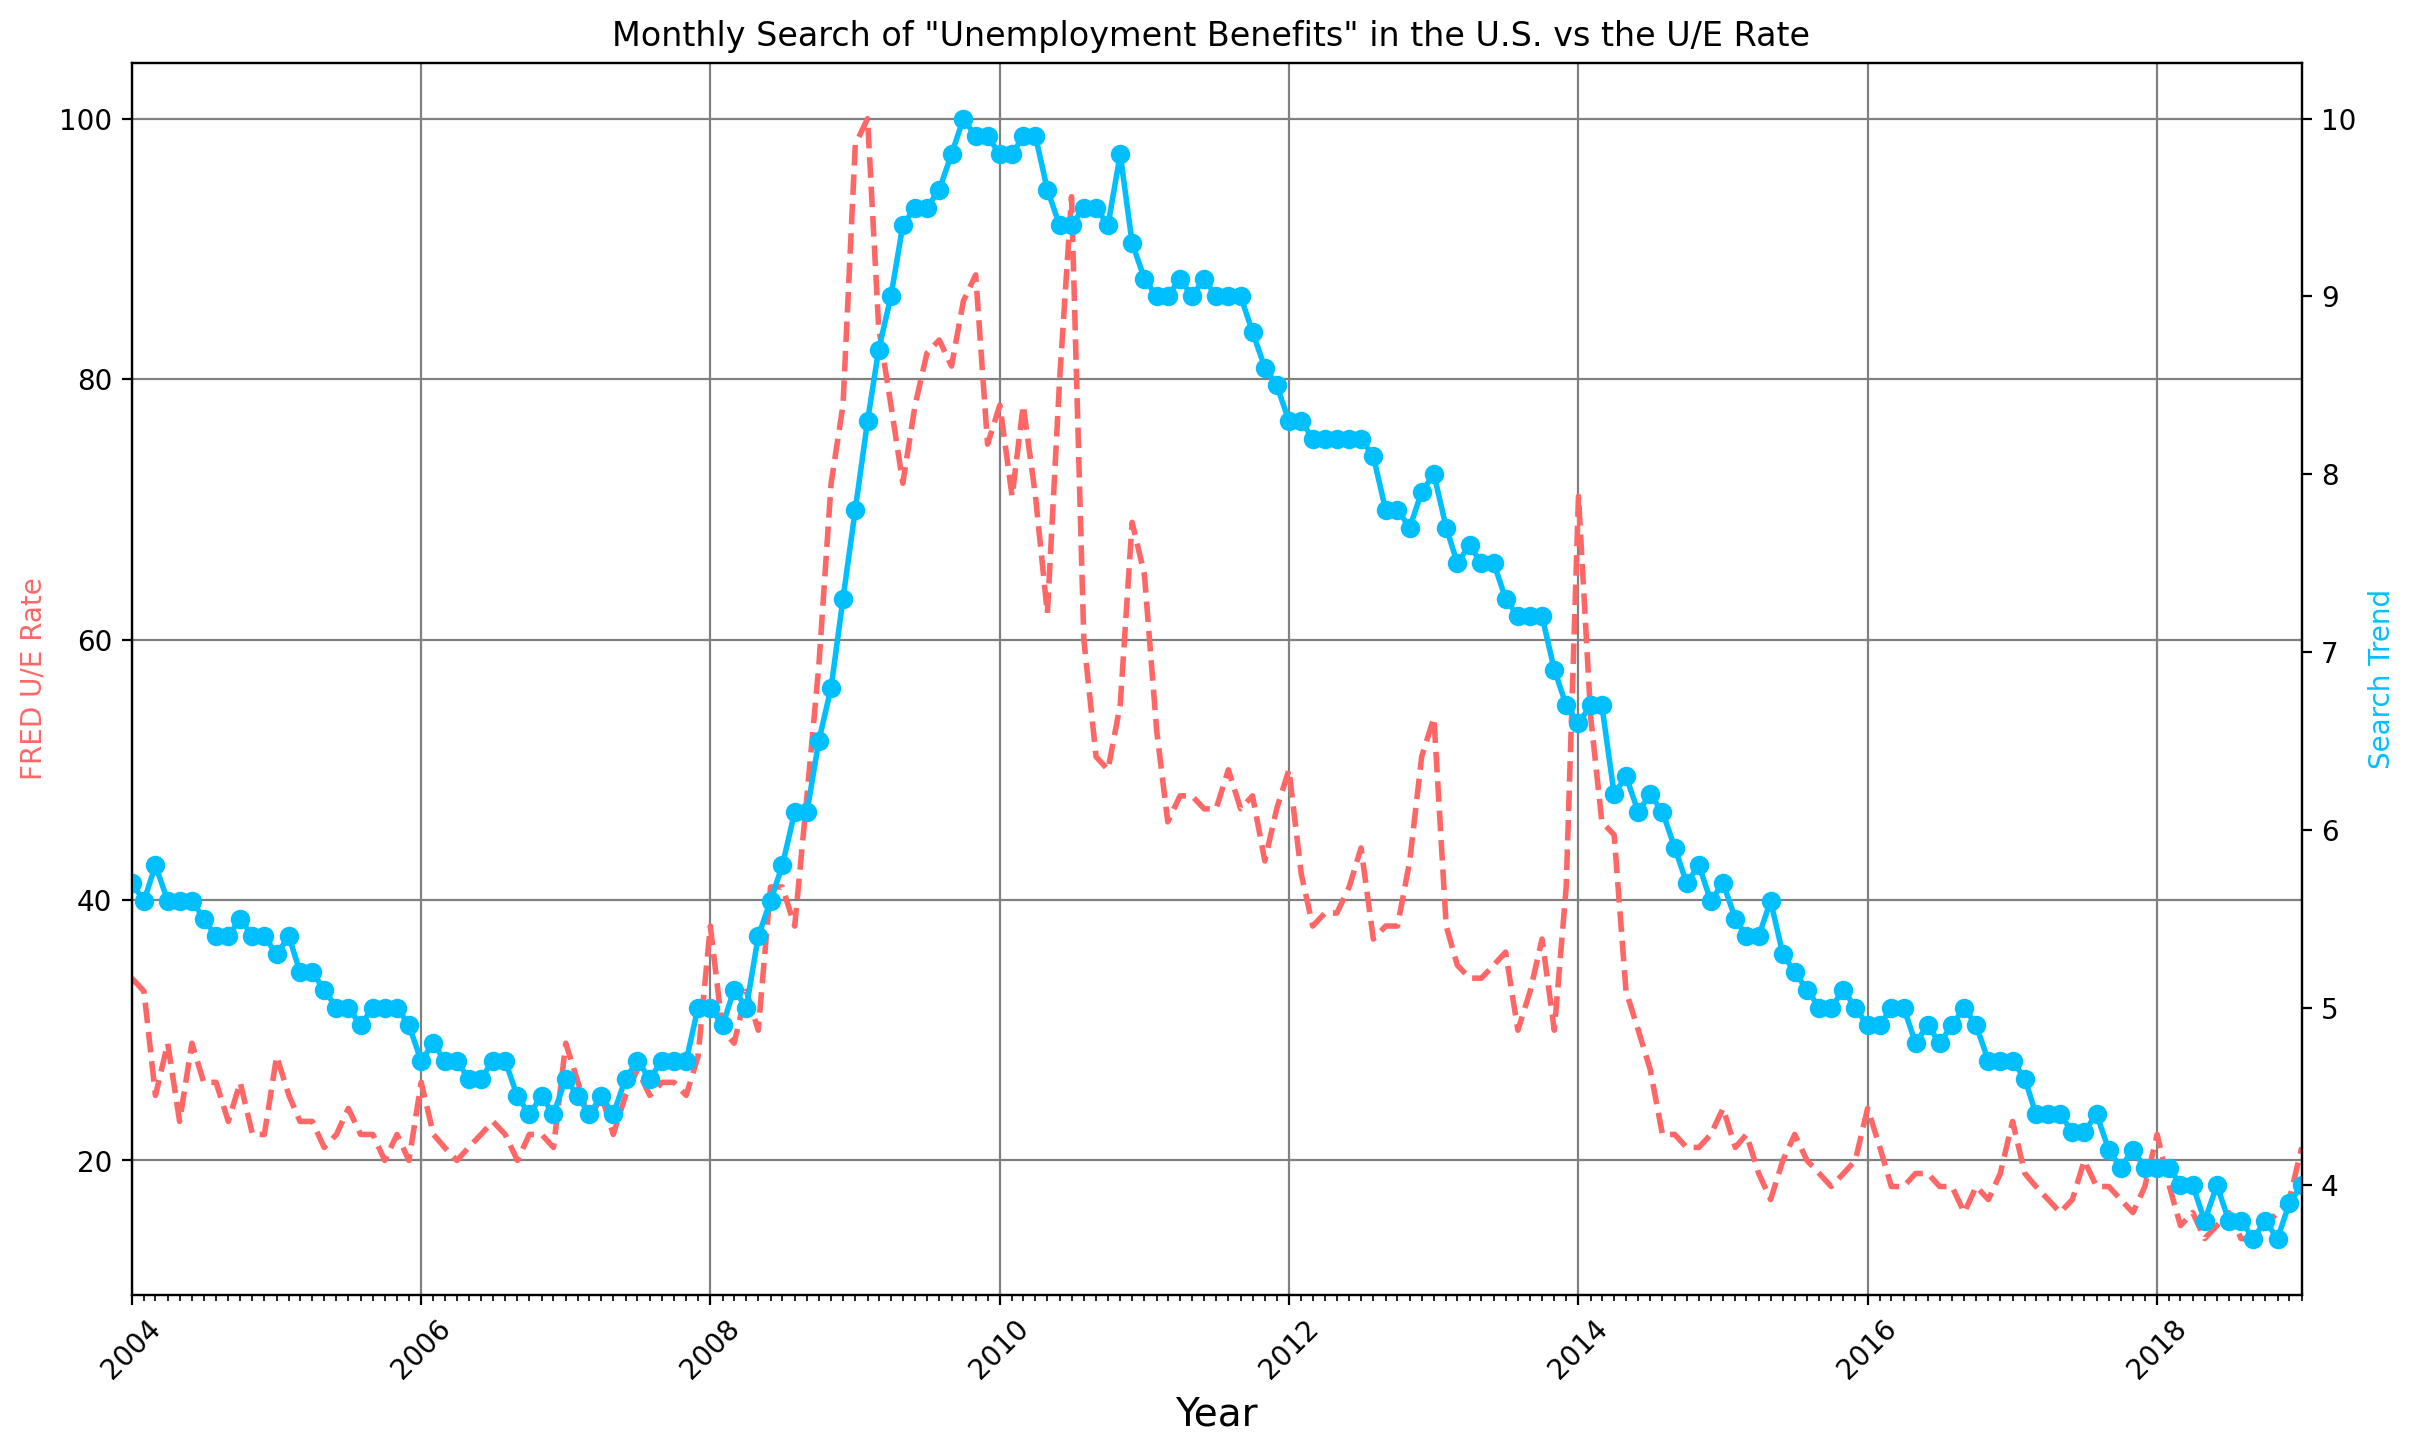

In [79]:
# Carry over your existing code once again (by copy-pasting the entire cell) and make some modifications.

plt.figure(figsize=(14,8), dpi=200) # increased the figure size (e.g., to 14 by 8) and changed dpi
plt.xticks(rotation=45) # rotated the xticks
plt.grid(linestyle='-', color='#808080') #added grids with color and linestyle

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

plt.xticks(xticks_list)

ax1.set_xlabel('Year', fontsize=14) # increase the font size
ax1.set_ylabel('FRED U/E Rate', fontsize=10, color='#ff6767') # using a HEX code for a red colour for the stock price
ax2.set_ylabel('Search Trend', fontsize=10, color='deepskyblue') # using one of the blue colour names for the search volume

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate ') # changed title

# # setting axes limits
ax1.set_xlim(pd.to_datetime('2004-01-01'), pd.to_datetime('2019-01-01'))
# ax1.set_ylim(0, 500)
ax2.set_xlim(pd.to_datetime('2004-01-01'), pd.to_datetime('2019-01-01'))
# ax2.set_ylim(5, 30)

ax1.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], color='#ff6767', linewidth=2.0, linestyle='dashed') # made the lines thicker
ax2.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], color='deepskyblue', linewidth=2.0, marker = 'o')

plt.show() # used plt.show()

Notice how we can now clearly see the vertical dashed lines line up with spikes in searches for "Unemployment benefits". Many of the spikes are at year-end - in December. This clearly shows that there is seasonality in the job market. What else do we see? We see that the financial crisis in 2007/2008 caused a massive spike in unemployment. It took around 10 years (2007-2017) for the unemployment to reach the same level it had before the crisis.

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-10_11-11-32-f521501ab3715056f21ed2265f229e3b.png'/>

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [80]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MONTH                   181 non-null    datetime64[ns]
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64         
 2   UNRATE                  181 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.4 KB


In [81]:
# The window is number of observations that are averaged
df_unemployment_3_month_rolling_avg = df_unemployment.rolling(window=3).mean()

DataError: Cannot aggregate non-numeric type: datetime64[ns]

In [82]:
df_unemployment.set_index('MONTH', inplace=True)

In [83]:
df_unemployment.head(n=5)

,UE_BENEFITS_WEB_SEARCH,UNRATE
MONTH,,
2004-01-01,34,5.7
2004-02-01,33,5.6
2004-03-01,25,5.8
2004-04-01,29,5.6
2004-05-01,23,5.6


In [84]:
# The window is number of observations that are averaged
df_unemployment_3_month_rolling_avg = df_unemployment.rolling(window=3).mean()
df_unemployment_6_month_rolling_avg = df_unemployment.rolling(window=6).mean()

In [85]:
df_unemployment_3_month_rolling_avg.head(n=10)

,UE_BENEFITS_WEB_SEARCH,UNRATE
MONTH,,
2004-01-01,NaN,NaN
2004-02-01,NaN,NaN
2004-03-01,30.666667,5.700000
2004-04-01,29.000000,5.666667
2004-05-01,25.666667,5.666667
2004-06-01,27.000000,5.600000
2004-07-01,26.000000,5.566667
2004-08-01,27.000000,5.500000
2004-09-01,25.000000,5.433333


In [86]:
df_unemployment_6_month_rolling_avg.head(n=10)

,UE_BENEFITS_WEB_SEARCH,UNRATE
MONTH,,
2004-01-01,NaN,NaN
2004-02-01,NaN,NaN
2004-03-01,NaN,NaN
2004-04-01,NaN,NaN
2004-05-01,NaN,NaN
2004-06-01,28.833333,5.650000
2004-07-01,27.500000,5.616667
2004-08-01,26.333333,5.583333
2004-09-01,26.000000,5.516667


In [87]:
# Now that the rolling averages are done, let's reset index in the original df
df_unemployment.reset_index(inplace=True)

In [88]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MONTH                   181 non-null    datetime64[ns]
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64         
 2   UNRATE                  181 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.4 KB


In [89]:
# Similarly
df_unemployment_6_month_rolling_avg.reset_index(inplace=True)

Plot the 6-month rolling average search data against the actual unemployment (search).

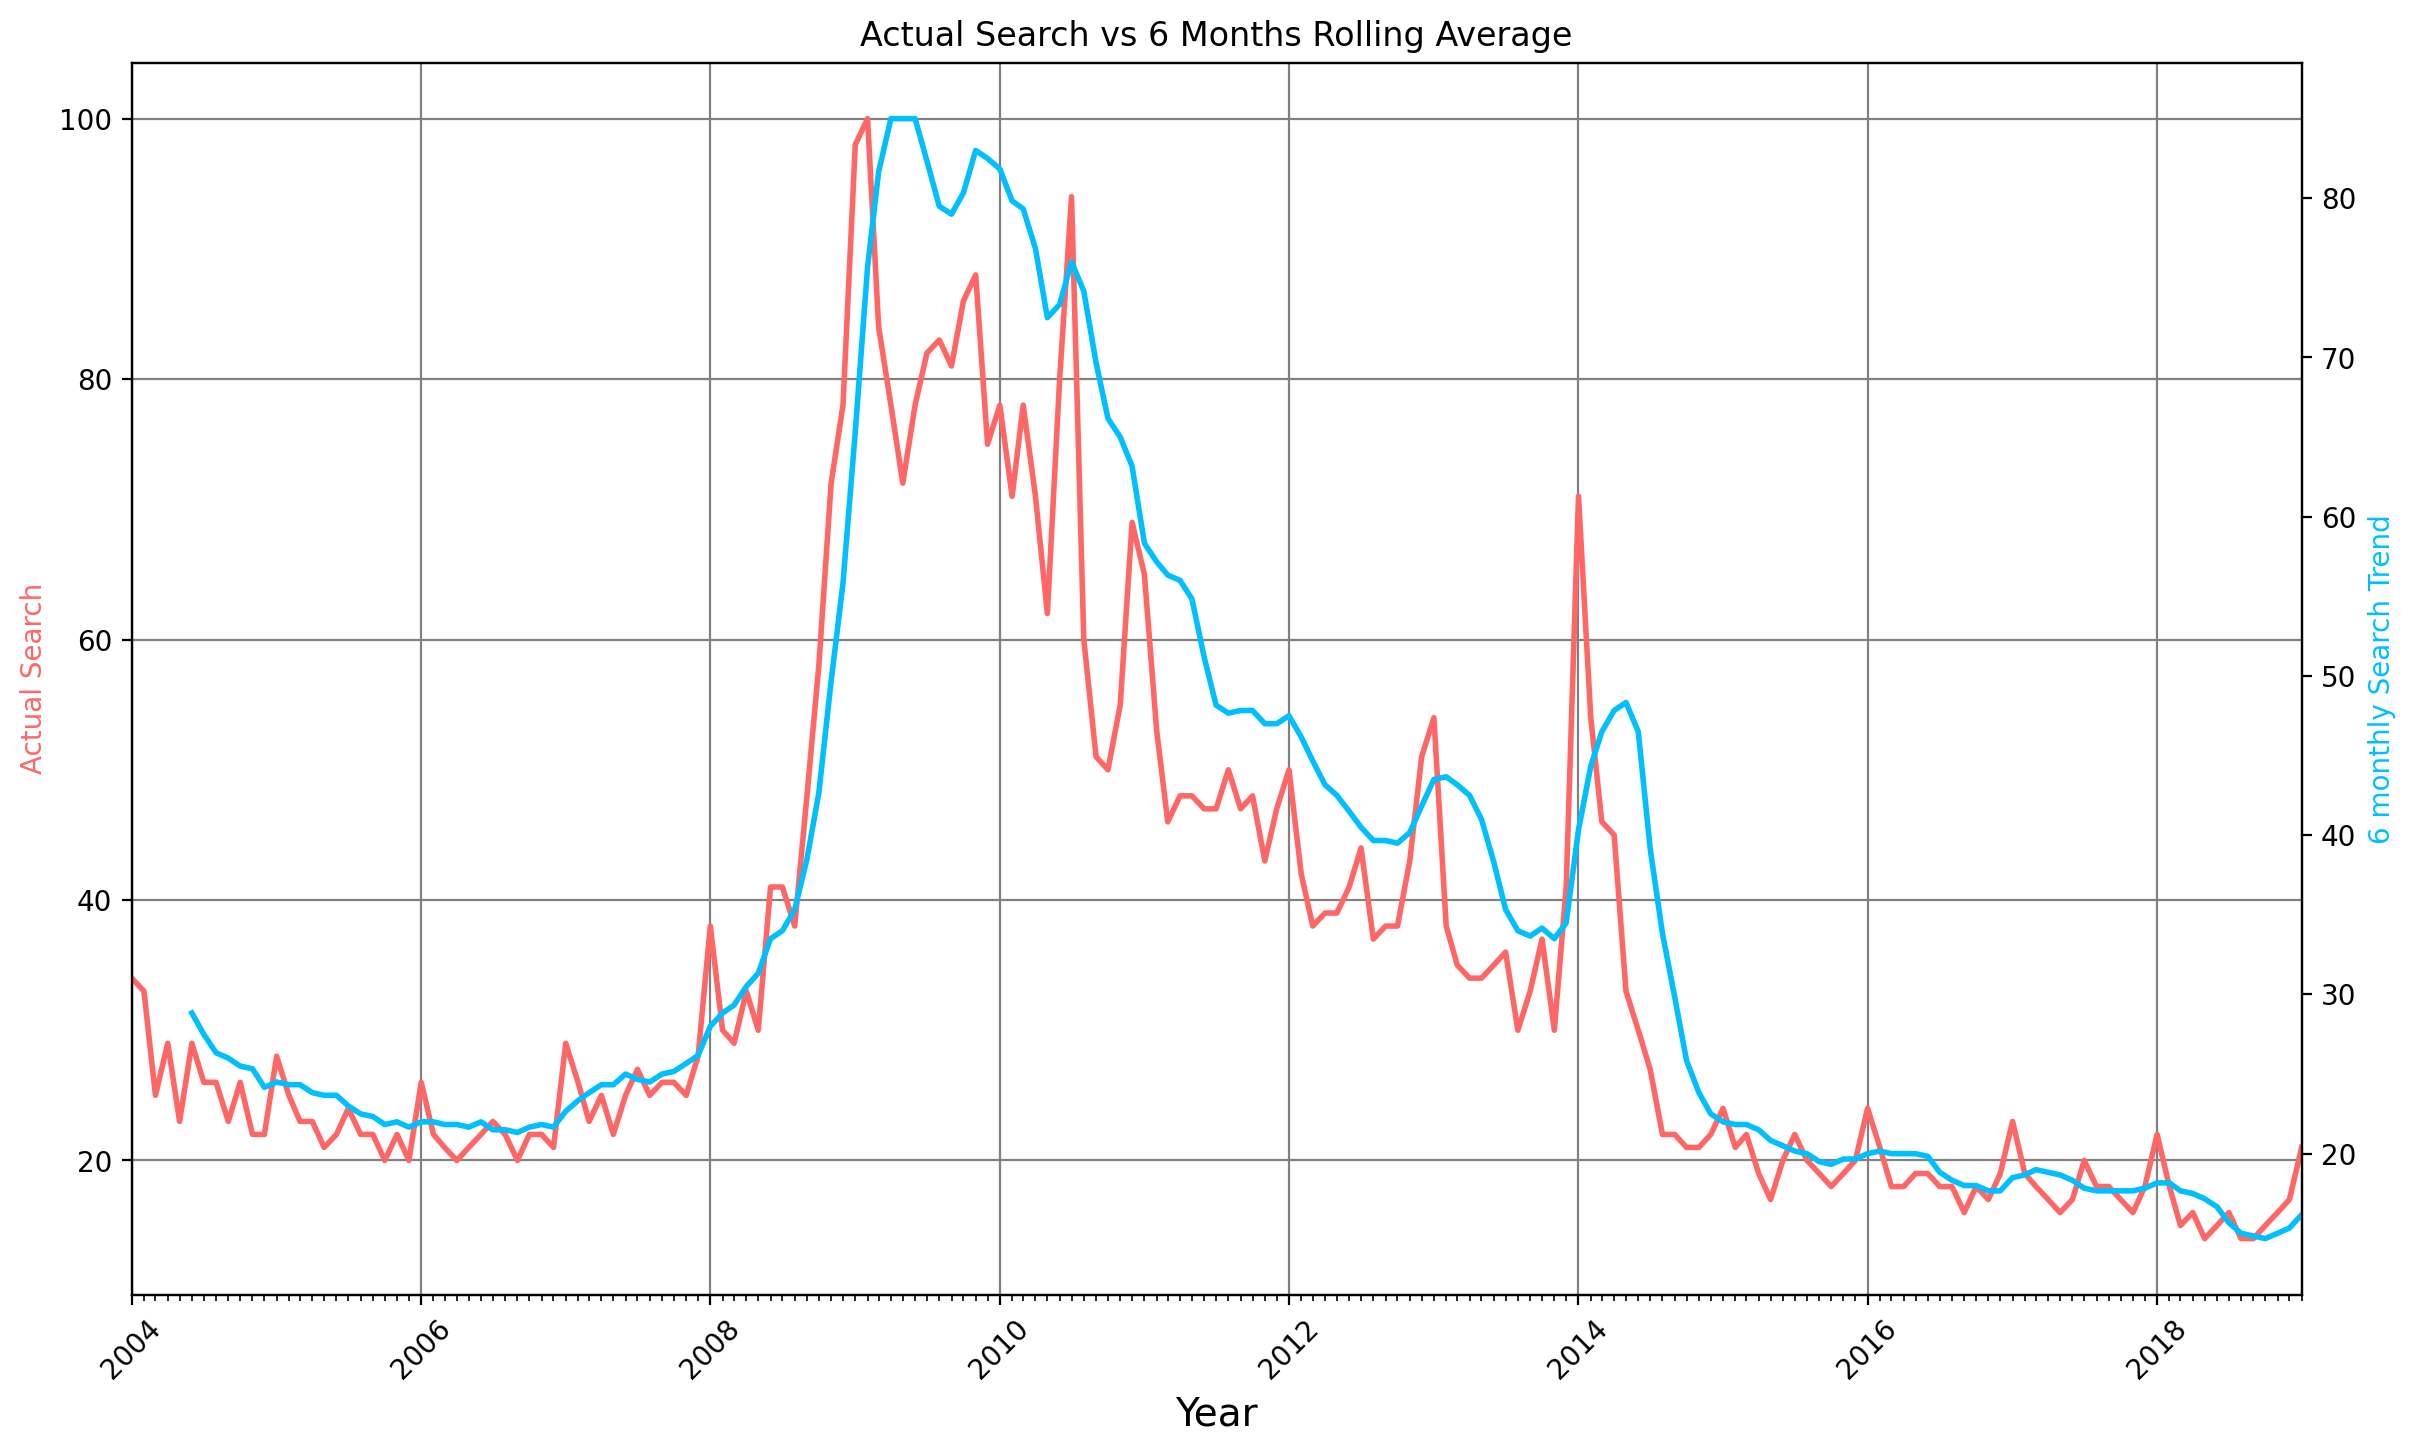

In [90]:
# Carry over your existing code once again (by copy-pasting the entire cell) and make some modifications.

plt.figure(figsize=(14,8), dpi=200) # increased the figure size (e.g., to 14 by 8) and changed dpi
plt.xticks(rotation=45) # rotated the xticks
plt.grid(linestyle='-', color='#808080') #added grids with color and linestyle

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

plt.xticks(xticks_list)

ax1.set_xlabel('Year', fontsize=14) # increase the font size
ax1.set_ylabel('Actual Search', fontsize=10, color='#ff6767') # using a HEX code for a red colour for the stock price
ax2.set_ylabel('6 monthly Search Trend', fontsize=10, color='deepskyblue') # using one of the blue colour names for the search volume

plt.title('Actual Search vs 6 Months Rolling Average') # changed title

# # setting axes limits
ax1.set_xlim(pd.to_datetime('2004-01-01'), pd.to_datetime('2019-01-01'))
# ax1.set_ylim(0, 500)
ax2.set_xlim(pd.to_datetime('2004-01-01'), pd.to_datetime('2019-01-01'))
# ax2.set_ylim(5, 30)

ax1.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], color='#ff6767', linewidth=2.0) # made the lines thicker
ax2.plot(df_unemployment_6_month_rolling_avg['MONTH'], df_unemployment_6_month_rolling_avg['UE_BENEFITS_WEB_SEARCH'], color='deepskyblue', linewidth=2.0)

plt.show() # used plt.show()

Plot the 6-month rolling average search data against the actual unemployment (rate).

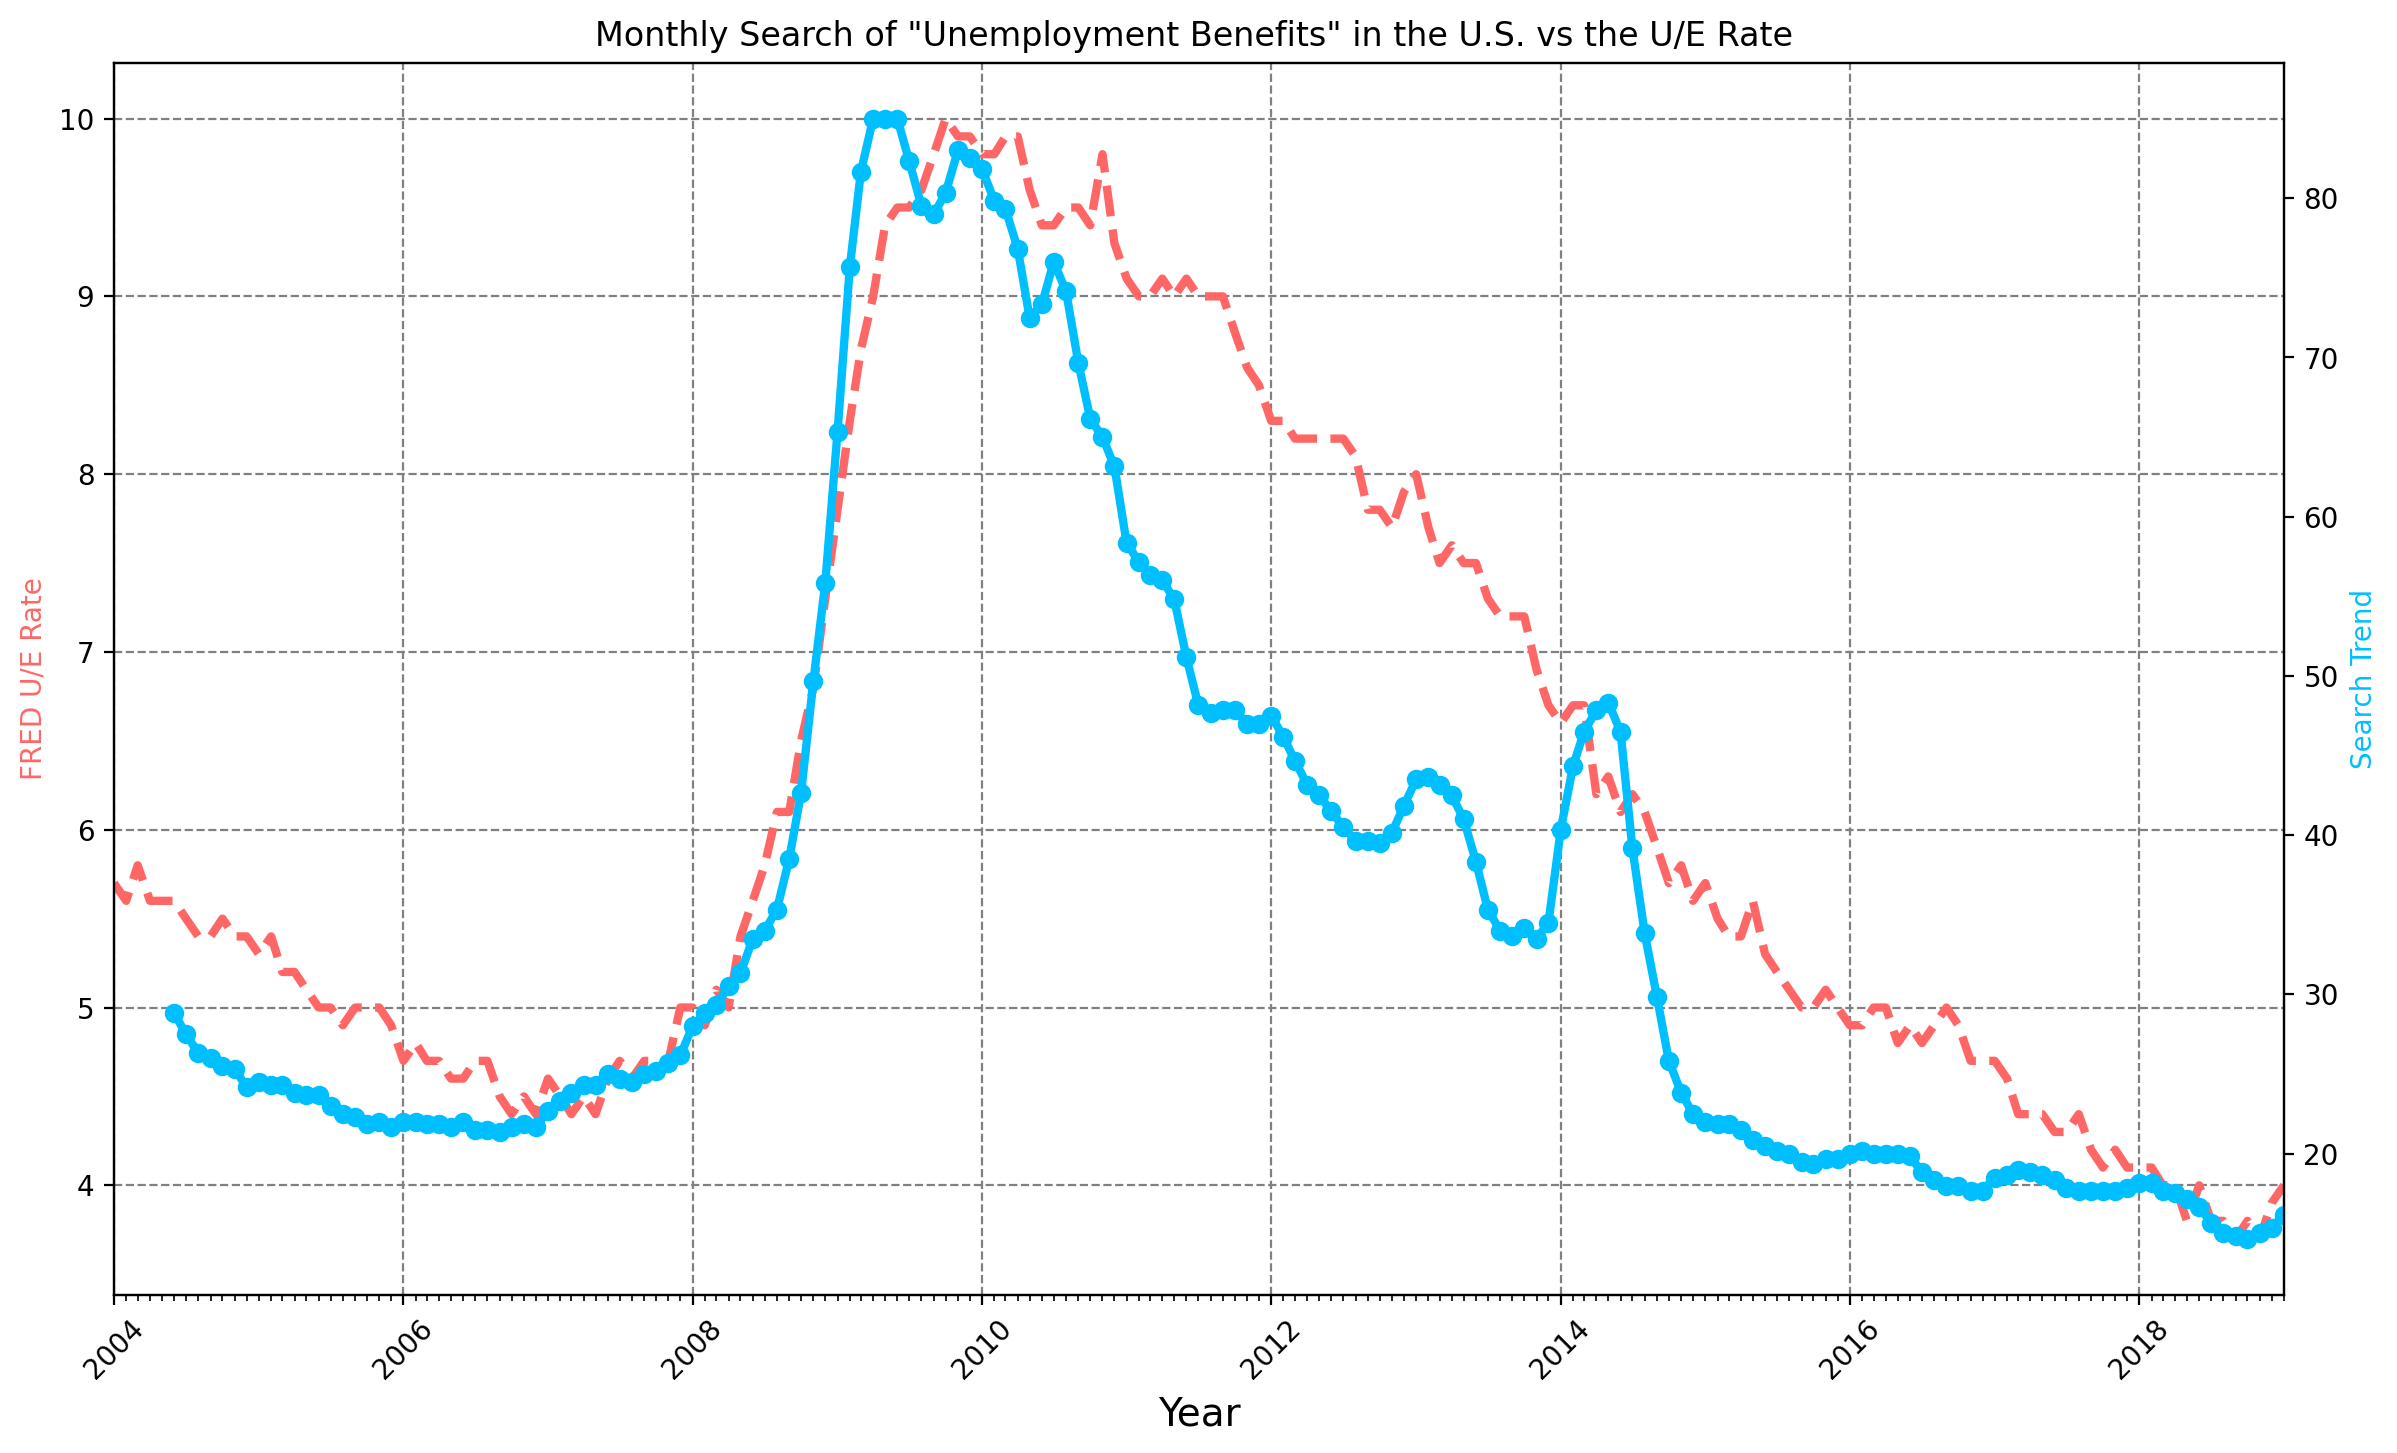

In [91]:
# Carry over your existing code once again (by copy-pasting the entire cell) and make some modifications.

plt.figure(figsize=(14,8), dpi=200) # increased the figure size (e.g., to 14 by 8) and changed dpi
plt.xticks(rotation=45) # rotated the xticks
plt.grid(linestyle='--', color='#808080') #added grids with color and linestyle

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

plt.xticks(xticks_list)

ax1.set_xlabel('Year', fontsize=14) # increase the font size
ax1.set_ylabel('FRED U/E Rate', fontsize=10, color='#ff6767') # using a HEX code for a red colour for the stock price
ax2.set_ylabel('Search Trend', fontsize=10, color='deepskyblue') # using one of the blue colour names for the search volume

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate ') # changed title

# # setting axes limits
ax1.set_xlim(pd.to_datetime('2004-01-01'), pd.to_datetime('2019-01-01'))
# ax1.set_ylim(0, 500)
ax2.set_xlim(pd.to_datetime('2004-01-01'), pd.to_datetime('2019-01-01'))
# ax2.set_ylim(5, 30)

# Addressing a mistake previously made, ax1 should be unemployment rate and ax2 should be the search trend
ax1.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], color='#ff6767', linewidth=3.0, linestyle='--') # made the lines thicker
ax2.plot(df_unemployment_6_month_rolling_avg['MONTH'], df_unemployment_6_month_rolling_avg['UE_BENEFITS_WEB_SEARCH'], color='deepskyblue', linewidth=3.0, marker = 'o')

plt.show() # used plt.show()

Here is another way we can do this.

In [92]:
df_unemployment.head(n=3)

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8


In [93]:
v2_df_unemployment_6_month_rolling_avg = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

In [94]:
v2_df_unemployment_6_month_rolling_avg.head(n=10)

,UE_BENEFITS_WEB_SEARCH,UNRATE
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,28.833333,5.650000
6,27.500000,5.616667
7,26.333333,5.583333
8,26.000000,5.516667
9,25.500000,5.500000


**But this above does not contain the date anymore. But since this df contians the same number of rows (just the actual values have been changed to their averages), we can use the `'MONTH'` column from the actual `df_unemployment` df**

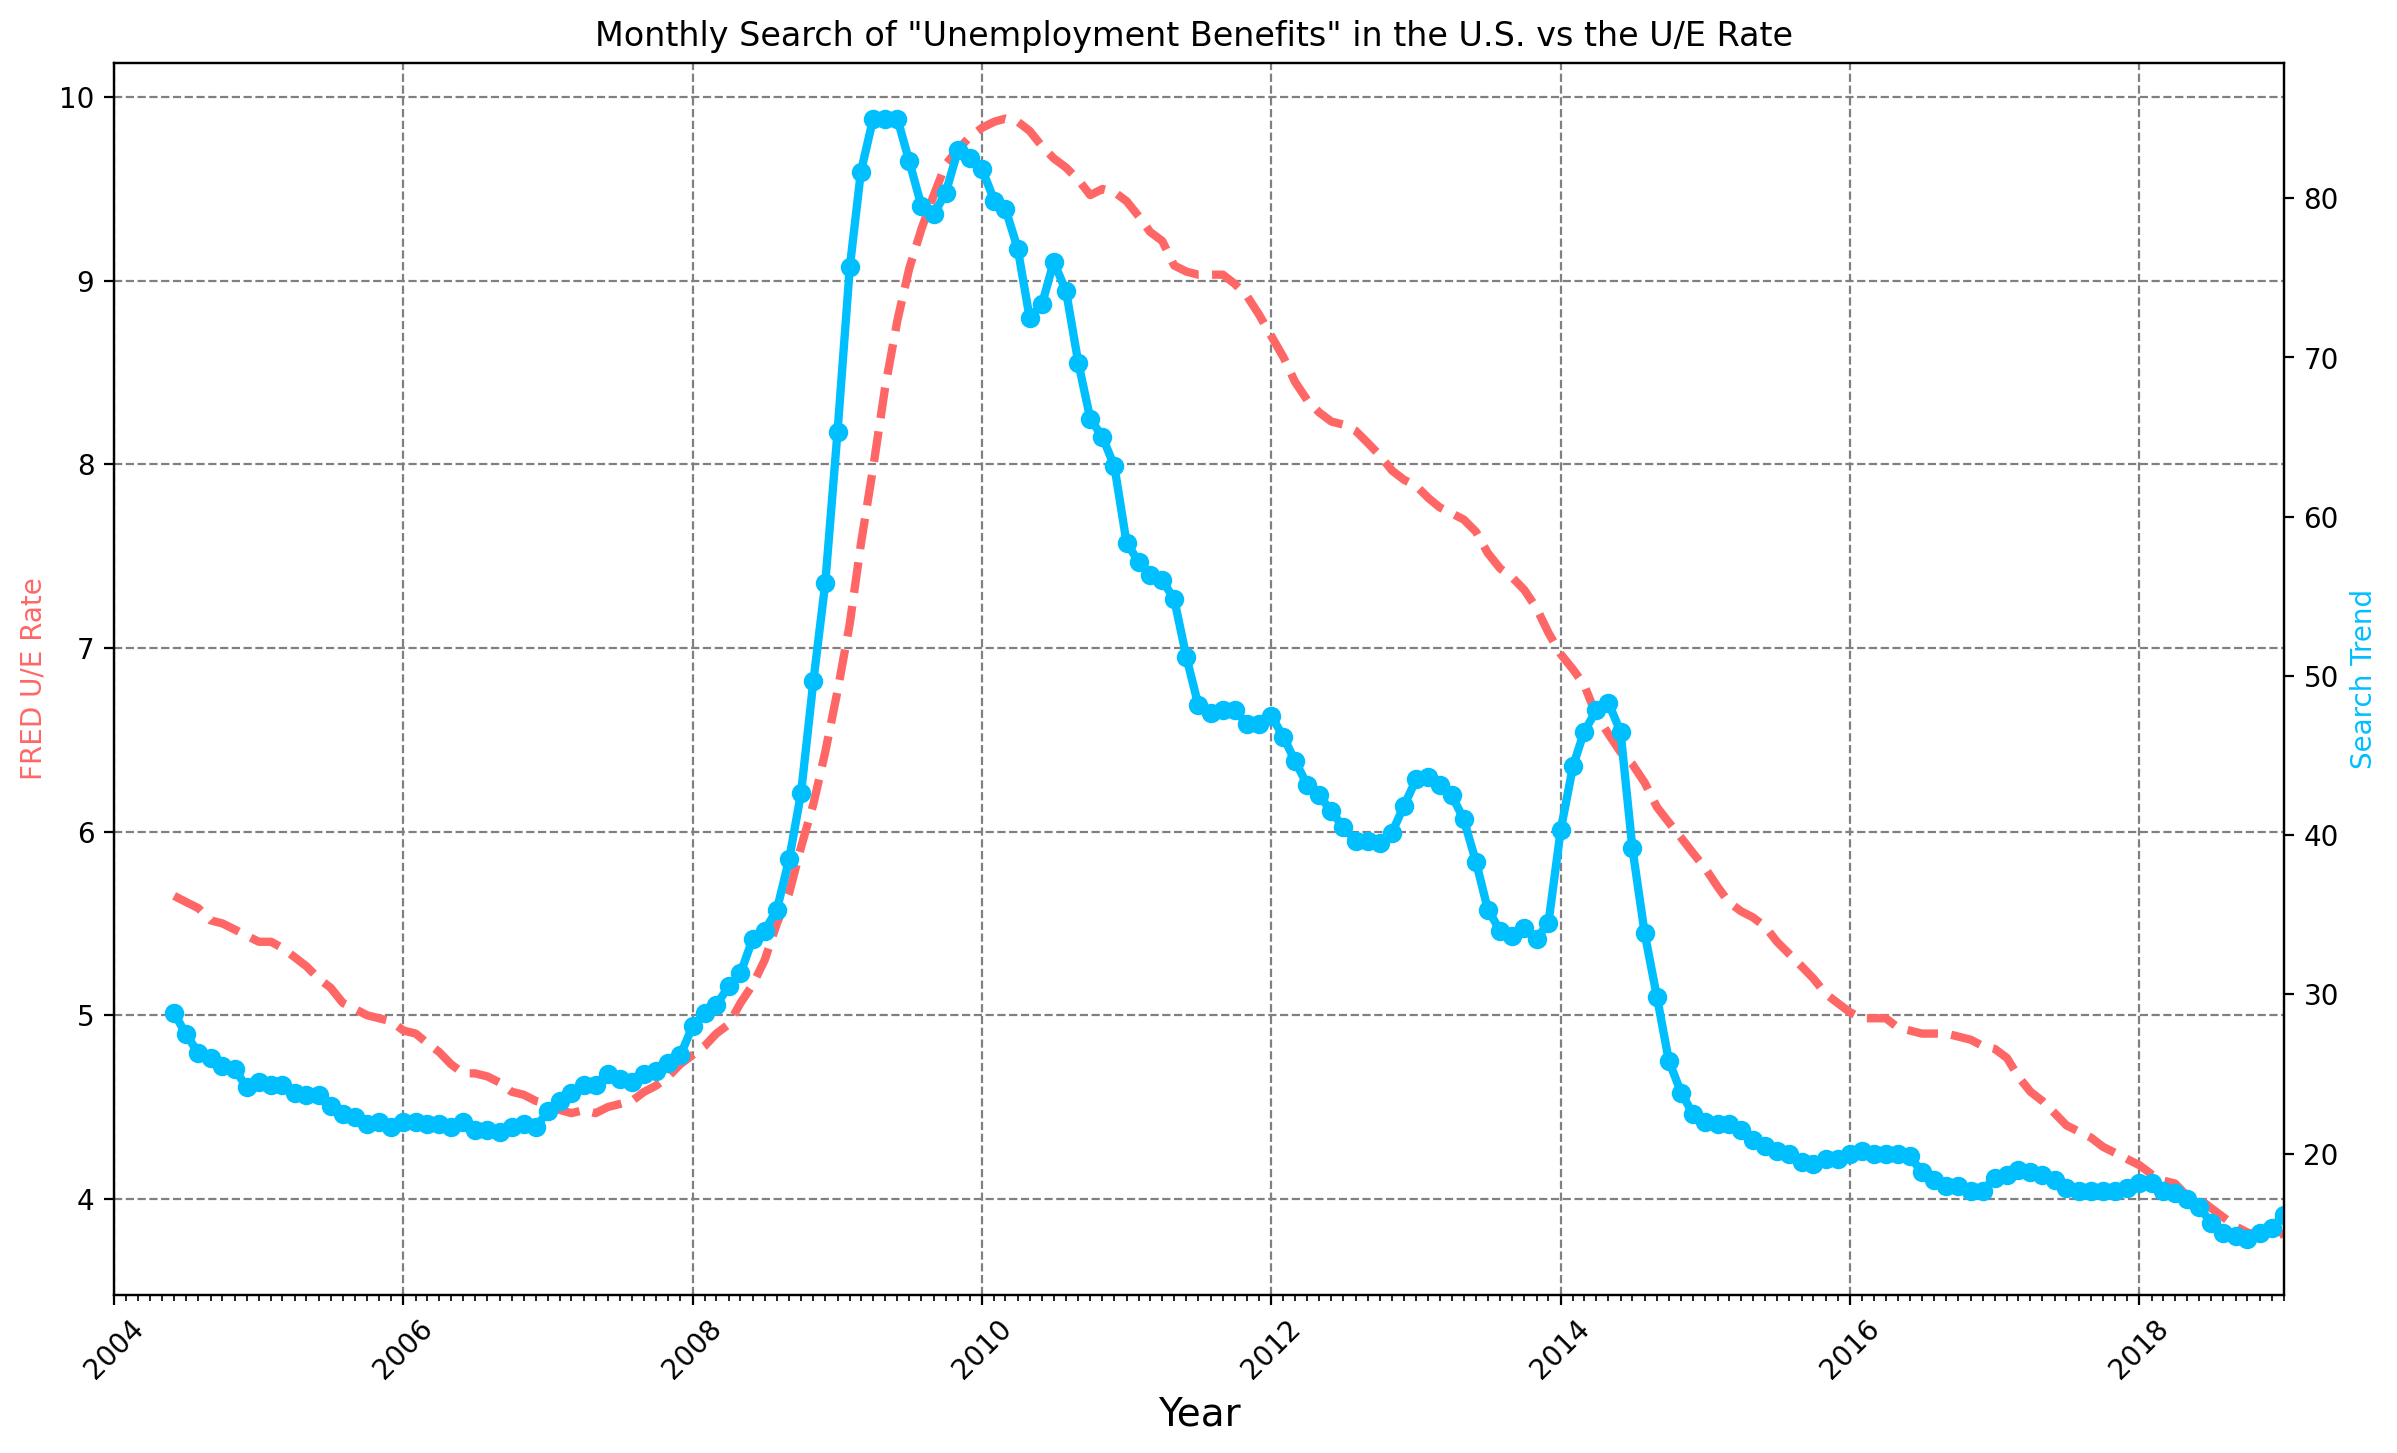

In [95]:
# Carry over your existing code once again (by copy-pasting the entire cell) and make some modifications.

plt.figure(figsize=(14,8), dpi=200) # increased the figure size (e.g., to 14 by 8) and changed dpi
plt.xticks(rotation=45) # rotated the xticks
plt.grid(linestyle='--', color='#808080') #added grids with color and linestyle

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

plt.xticks(xticks_list)

ax1.set_xlabel('Year', fontsize=14) # increase the font size
ax1.set_ylabel('FRED U/E Rate', fontsize=10, color='#ff6767') # using a HEX code for a red colour for the stock price
ax2.set_ylabel('Search Trend', fontsize=10, color='deepskyblue') # using one of the blue colour names for the search volume

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate ') # changed title

# # setting axes limits
ax1.set_xlim(pd.to_datetime('2004-01-01'), pd.to_datetime('2019-01-01'))
# ax1.set_ylim(0, 500)
ax2.set_xlim(pd.to_datetime('2004-01-01'), pd.to_datetime('2019-01-01'))
# ax2.set_ylim(5, 30)

# Addressing a mistake previously made, ax1 should be unemployment rate and ax2 should be the search trend
ax1.plot(df_unemployment['MONTH'], v2_df_unemployment_6_month_rolling_avg['UNRATE'], color='#ff6767', linewidth=3.0, linestyle='--') # made the lines thicker
ax2.plot(df_unemployment['MONTH'], v2_df_unemployment_6_month_rolling_avg['UE_BENEFITS_WEB_SEARCH'], color='deepskyblue', linewidth=3.0, marker = 'o')

plt.show() # used plt.show()

What is this telling us? We see that searches for "Unemployment Benefits" happen before the actual official unemployment rate goes up. Similarly, the search popularity for the term goes down before the unemployment rate decreases. In other words, these searches seem to act as a leading economic indicator for the unemployment rate (which is a lagging indicator).

<img src='https://img-c.udemycdn.com/redactor/raw/2020-10-10_11-12-13-66757e8b039624b51ee60e4f8b4670a3.png'/>

# 629 Data Visualisation - Unemployment_ The Effect of New Data

The financial crisis in 2008 was pretty bad. We saw how it took around 10 years for the unemployment rate to go back to where it was prior to the crisis.

Let's see how 2020 affects our analysis.

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [96]:
df_unemployment_04_20 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [97]:
df_unemployment_04_20.head(n=5)

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


Convert the MONTH column to Pandas Datetime. We did it previously [here](https://colab.research.google.com/drive/1FX_pG-CW7KMaoBiXz4CtBKeIlDh1czKC?authuser=2#scrollTo=J9sYn20lHeng).

In [98]:
df_unemployment_04_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   200 non-null    object 
 1   UE_BENEFITS_WEB_SEARCH  200 non-null    int64  
 2   UNRATE                  200 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


In [99]:
df_unemployment_04_20['MONTH'] = pd.to_datetime(df_unemployment_04_20['MONTH'])

In [100]:
df_unemployment_04_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MONTH                   200 non-null    datetime64[ns]
 1   UE_BENEFITS_WEB_SEARCH  200 non-null    int64         
 2   UNRATE                  200 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.8 KB


Now to plot the data.

In [101]:
df_unemployment_04_20.describe()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
count,200,200.000000,200.000000
mean,2012-04-16 05:02:24,10.315000,6.173000
min,2004-01-01 00:00:00,4.000000,3.500000
25%,2008-02-22 18:00:00,5.000000,4.600000
50%,2012-04-16 00:00:00,7.000000,5.400000
75%,2016-06-08 12:00:00,12.000000,7.825000
max,2020-08-01 00:00:00,100.000000,14.700000
std,NaN,10.778061,2.128267


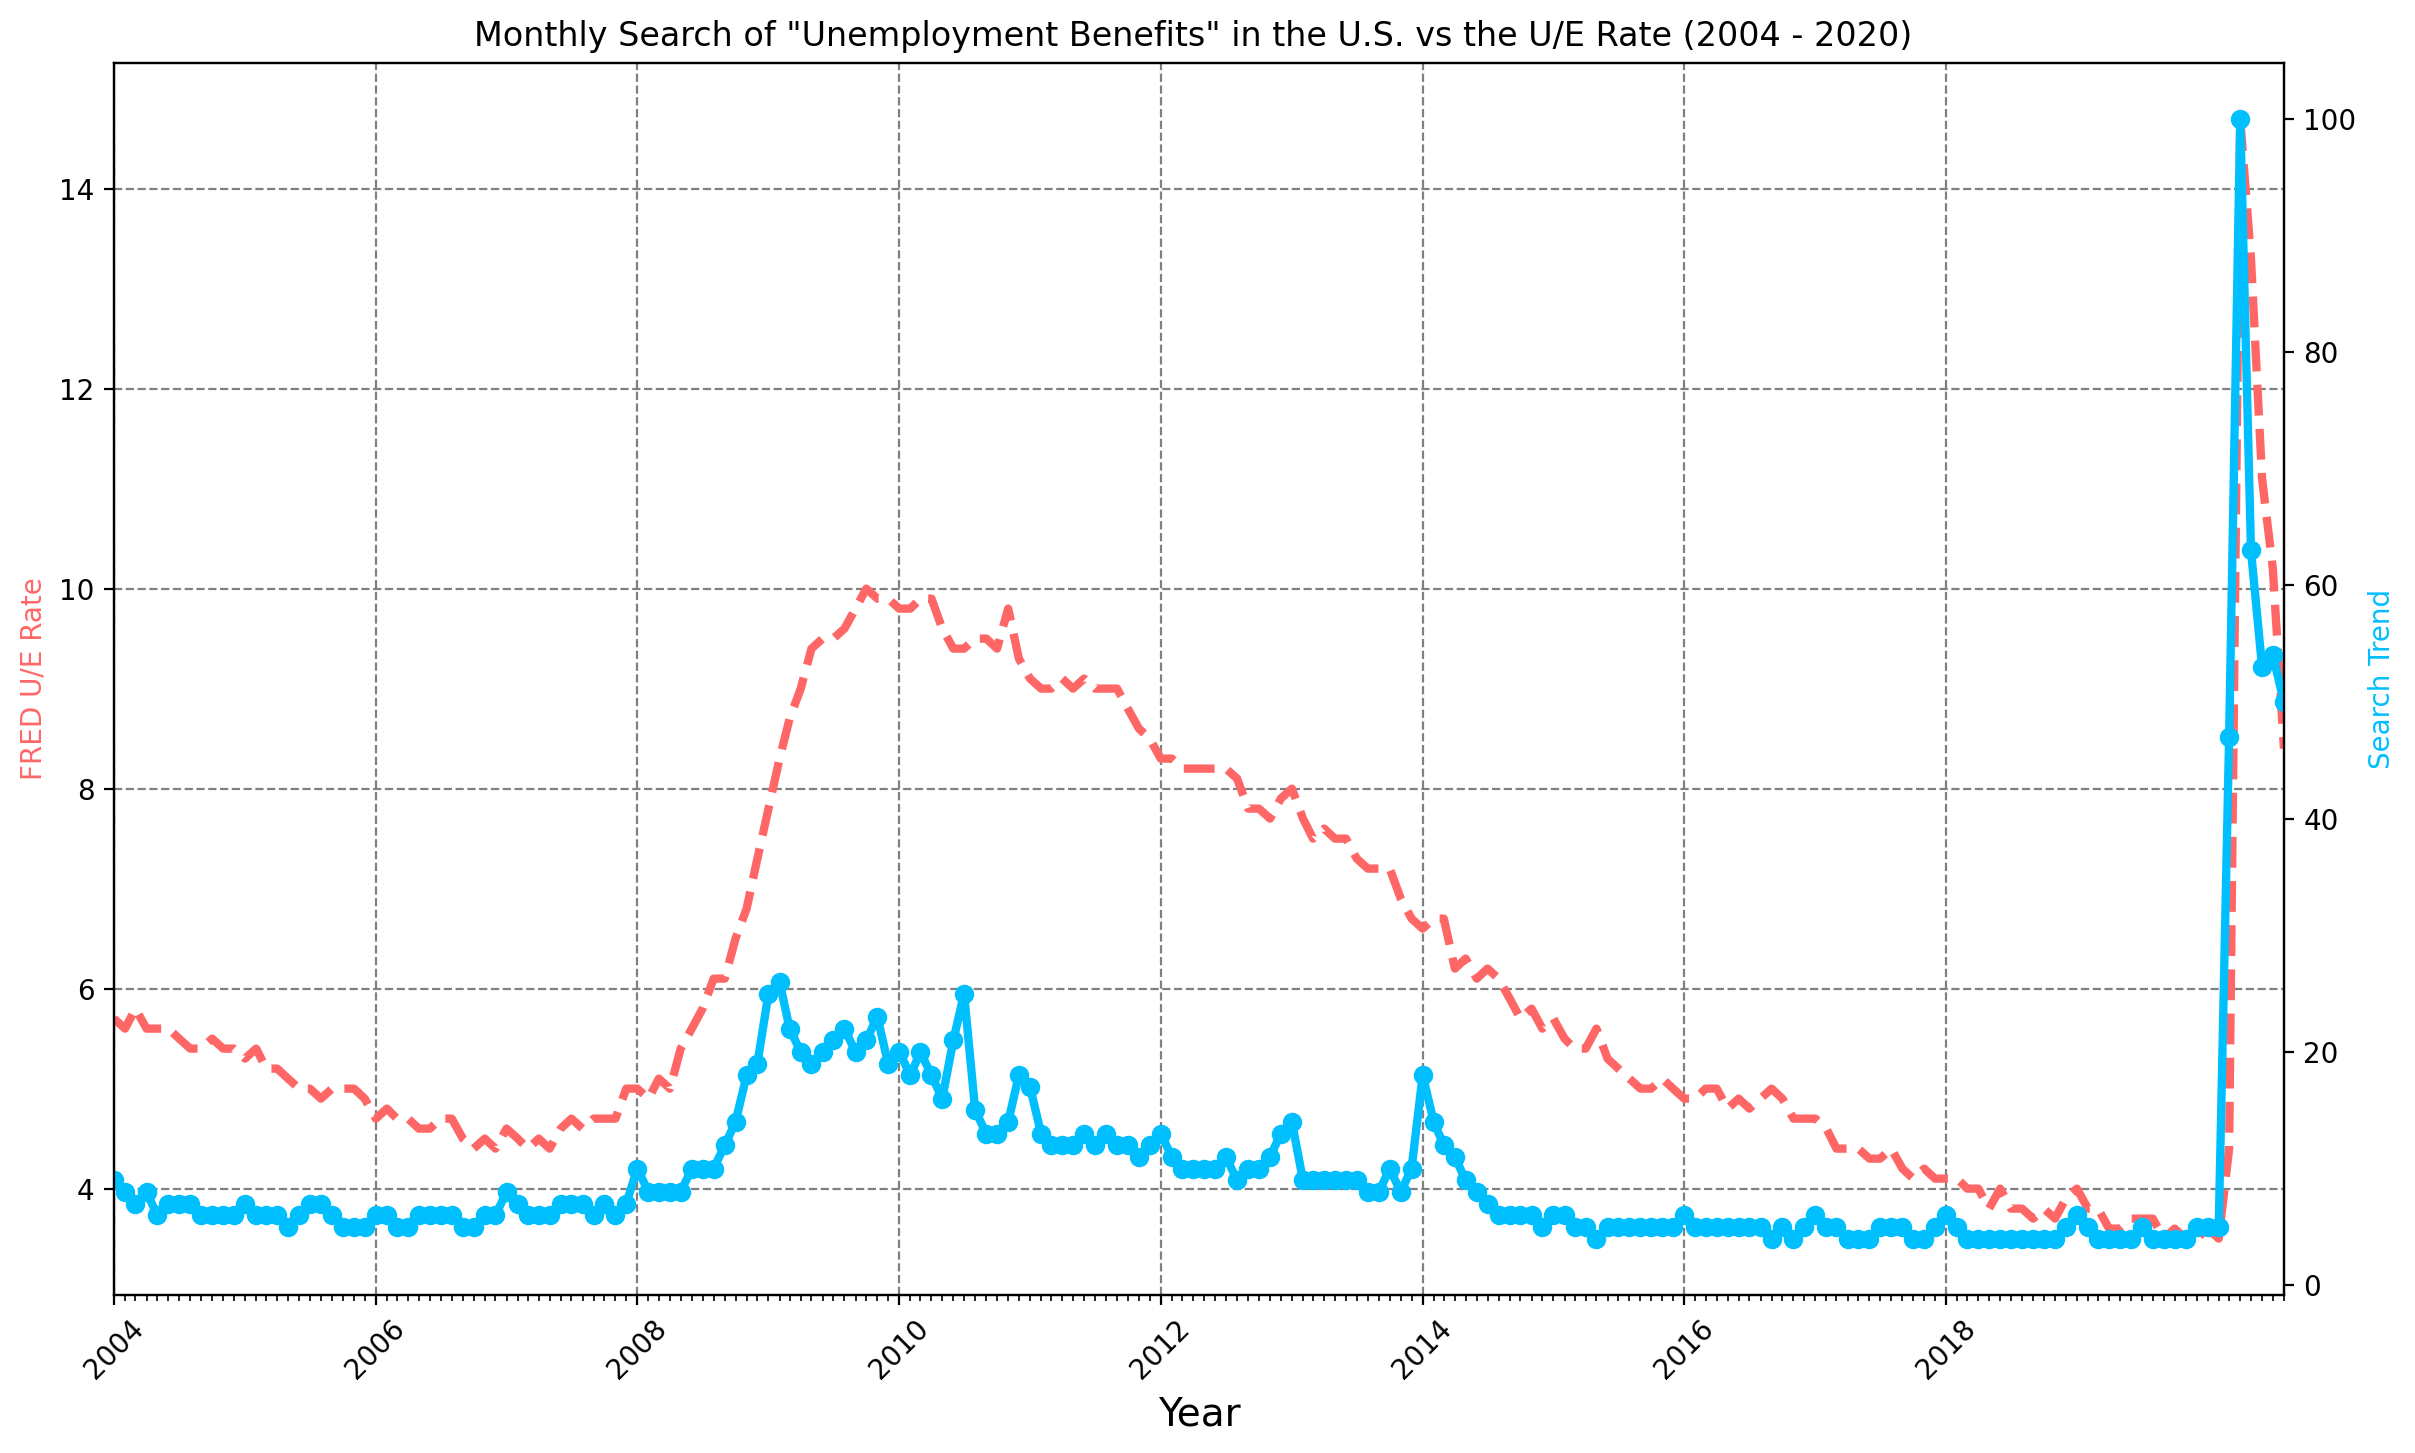

In [105]:
# Carry over your existing code once again (by copy-pasting the entire cell) and make some modifications.

plt.figure(figsize=(14,8), dpi=200) # increased the figure size (e.g., to 14 by 8) and changed dpi
plt.xticks(rotation=45) # rotated the xticks
plt.grid(linestyle='--', color='#808080') #added grids with color and linestyle

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # create another axis that shares the same x-axis

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

plt.xticks(xticks_list)

ax1.set_xlabel('Year', fontsize=14) # increase the font size
ax1.set_ylabel('FRED U/E Rate', fontsize=10, color='#ff6767') # using a HEX code for a red colour for the stock price
ax2.set_ylabel('Search Trend', fontsize=10, color='deepskyblue') # using one of the blue colour names for the search volume

plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate (2004 - 2020) ') # changed title

# # setting axes limits
ax1.set_xlim(pd.to_datetime('2004-01-01'), pd.to_datetime('2020-08-01')) # changed the upper limit to 2020
# ax1.set_ylim(0, 500)
ax2.set_xlim(pd.to_datetime('2004-01-01'), pd.to_datetime('2020-08-01')) # changed the upper limit to 2020
# ax2.set_ylim(5, 30)

# Addressing a mistake previously made, ax1 should be unemployment rate and ax2 should be the search trend
ax1.plot(df_unemployment_04_20['MONTH'], df_unemployment_04_20['UNRATE'], color='#ff6767', linewidth=3.0, linestyle='--') # made the lines thicker
ax2.plot(df_unemployment_04_20['MONTH'], df_unemployment_04_20['UE_BENEFITS_WEB_SEARCH'], color='deepskyblue', linewidth=3.0, marker = 'o')

plt.show() # used plt.show()

We see a spike in the most recent times.

<img src= 'https://img-c.udemycdn.com/redactor/raw/2020-10-10_11-14-12-32b356c73fc9f6654195ac97aaf8155e.png' />

# 630 Learning Points & Summary

In this lesson we looked at how to:

How to use `.describe()` to quickly see some descriptive statistics at a glance.

How to use `.resample()` to make a time-series data comparable to another by changing the periodicity.

How to work with `matplotlib.dates` Locators to better style a timeline (e.g., an axis on a chart).

How to find the number of NaN values with `.isna().values.sum()` or `.isnull().values.sum()`

How to change the resolution of a chart using the figure's `dpi`

How to create dashed `'--'` and dotted `'-.'` lines using linestyles

How to use different kinds of markers (e.g., `'o'` or `'^'`) on charts.

Fine-tuning the styling of Matplotlib charts by using `limits`, `labels`, `linewidth` and `colours` (both in the form of named colours and HEX codes).

Using `.grid()` to help visually identify seasonality in a time series.

